# **0. Introduction**

<center><img src='https://images.unsplash.com/photo-1612103147485-8c8de055942b?q=80&w=3269&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D' ></center>

Product Recommendation merupakan sistem atau teknologi yang memberikan rekomendasi kepada pengguna mengenai produk atau layanan yang sesuai dengan kebutuhan atau preferensi mereka. Dalam konteks e-commerce, keberadaan model product recommendation memiliki peranan krusial.

Pentingnya Product Recommendation dalam E-Commerce:

1. **Peningkatan Pengalaman Pengguna:** Rekomendasi yang relevan dapat meningkatkan pengalaman pengguna, memudahkan mereka menemukan produk tanpa harus melakukan pencarian manual yang melelahkan.

2. **Penjualan dan Pendapatan:** Sistem rekomendasi dapat merangsang penjualan dengan mendorong pembelian impulsif atau menyarankan produk tambahan sesuai dengan preferensi pelanggan, memberikan kontribusi pada peningkatan pendapatan bisnis.

3. **Personalisasi:** Model product recommendation memungkinkan personalisasi pengalaman belanja. Dengan memahami perilaku belanja pelanggan, sistem ini memberikan rekomendasi yang sesuai dengan preferensi individual, menciptakan pengalaman yang lebih personal.

4. **Retensi Pelanggan:** Memberikan rekomendasi yang akurat membangun hubungan yang lebih kuat dengan pelanggan. Pelanggan yang merasa didukung dalam menemukan produk sesuai keinginan mereka lebih mungkin untuk kembali berbelanja.

5. **Efisiensi:** Sistem rekomendasi membantu mengurangi waktu yang dibutuhkan untuk menelusuri produk, meningkatkan efisiensi dalam proses pencarian dan pembelian.

6. **Analisis Data:** Product recommendation membantu bisnis mengumpulkan data tentang perilaku pembelian dan preferensi pelanggan, memberikan wawasan berharga untuk mengoptimalkan strategi pemasaran dan penjualan.

Keputusan untuk memilih model product recommendation sebagai fokus Final Project diambil karena kesadaran akan peran krusialnya dalam meningkatkan performa dan keberhasilan bisnis e-commerce. Tim kami akan menggali lebih dalam untuk mengimplementasikan model ini dalam konteks perusahaan e-commerce, memahami bagaimana hal ini dapat memberikan dampak positif pada peningkatan penjualan, retensi pelanggan, dan efisiensi operasional secara keseluruhan.

# **I. Business Understanding**

## **Business Problems**

Setiap bisnis, termasuk e-commerce, bisa menghadapi masalah ketika rekomendasi produk tidak sesuai dengan keinginan pembeli. Jika ini terus terjadi, penjualan bisa turun drastis, bahkan membuat bisnis e-commerce gulung tikar.

Setiap e-commerce punya sistem rekomendasi sendiri berdasarkan model bisnis mereka. Tantangannya adalah bagaimana memahami apa yang diinginkan oleh setiap pembeli. Untuk mengatasi masalah ini, penting untuk riset dan tahu apa preferensi pembeli. Ini bisa melibatkan analisis data, survei pelanggan, dan pemahaman pasar.

Dengan memahami apa yang diinginkan oleh pembeli, e-commerce bisa meningkatkan rekomendasi produk, membuat pengalaman berbelanja lebih baik, dan akhirnya membuat pelanggan lebih puas. Jadi, mencari tahu apa yang diinginkan oleh setiap pembeli itu kunci sukses bagi bisnis e-commerce agar bisa bersaing dan tetap berjalan.

## **Business Goals**

Selain itu kami juga bertujuan untuk menyoroti pentingnya pemahaman terhadap preferensi setiap pembeli. Hal ini ditekankan sebagai langkah kunci untuk meningkatkan relevansi rekomendasi produk, meningkatkan pengalaman berbelanja, dan akhirnya mencapai kepuasan pelanggan.

# **II. Data Understanding**

## **Import Paket-paket**

Sebelum memulai analisis, kita perlu menyiapkan berbagai paket library yang kemungkinan akan digunakan. Seperti biasa, kita akan mengandalkan library utama seperti **Numpy** dan **Pandas**. Selain itu, kita juga akan menggunakan berbagai paket library pendukung seperti **Matplotlib**, **Seaborn**, dan sebagainya.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Install paket-paket
# !pip install scikit-learn nltk luwiji scikit-surprise pyspark

In [ ]:
# Paket-paket untuk melakukan pengolahan terhadap datasets
import numpy as np
import pandas as pd
import ast
import difflib
from datetime import datetime, timedelta

# Paket-paket untuk memvisualisasi datasets
import matplotlib.pyplot as plt
import seaborn as sns

# Paket-paket untuk melakukan proses lebih lanjut datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances
from nltk.tokenize import word_tokenize

# Import dan download paket-paket untuk nltk
import nltk
nltk.download('punkt')

# Paket-paket untuk rekomendasi menggunakan surprise
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise.model_selection import cross_validate

# Paket-paket untuk rekomendasi menggunakan pyspark
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType

# Import ilustrasi dari luwiji.recommendation_system
from luwiji.recommendation_system import illustration

## **Import Dataset**

Dataset kami terdiri dari tiga file: customer, transaction, dan produk, yang dapat di download melalui link berikut
[Download Dataset](https://bit.ly/SC5DS_MockupDataset?authuser=0).

Kami memutuskan untuk tidak menggunakan dataset clickstream karena kompleksitasnya yang tinggi. Penggunaan dataset ini dapat membantu rekomendasi produk menjadi lebih dinamis, dan mengikuti perubahan aktivitas pengguna. Pada kesempatan ini, kami memilih untuk tidak mengintegrasikannya.

Namun, di masa mendatang, pengembangan dengan memanfaatkan dataset clickstream mungkin bisa dilakukan. Hal ini akan lebih bermanfaat bagi perusahaan karena dapat memberikan rekomendasi berdasarkan pengetahuan terbaru tentang preferensi pengguna.

In [ ]:
# Import dataset customer.csv
df_customer = pd.read_csv('/content/drive/MyDrive/Mockup_Dataset/customer.csv')

In [ ]:
# Import dataset product.csv
df_product = pd.read_csv('/content/drive/MyDrive/Mockup_Dataset/product.csv', on_bad_lines='skip')

In [ ]:
# Import dataset transactions.csv
df_transactions = pd.read_csv('/content/drive/MyDrive/Mockup_Dataset/transactions.csv')

## **Understanding Dataset**

Selanjutnya, mari kita peroleh gambaran keseluruhan dari dataset secara singkat. Pada tahap ini, kita akan bersama-sama memahami arti dari atribut-atribut yang ada dalam dataset.

### **Dataset Customer**

In [ ]:
df_customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
df_customer.isna().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

### **Dataset Product**

In [ ]:
df_product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
df_product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

### **Dataset Transactions**

In [ ]:
df_transactions.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
df_transactions.isna().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

# **III. Data Preparation**

## **Feature Selection**

Setelah memeriksa dataset secara singkat, kami menyadari perlunya melakukan pemisahan fitur untuk memilih kolom-kolom yang ada di semua dataset, sehingga dapat membentuk satu dataset utuh.

### **Customer**

Pada dataset customer, kami mengambil kolom-kolom sebagai berikut:

'customer_id', 'gender', 'birthdate', 'home_location', 'first_join_date'

serta melakukan perubahan nama pada gender menjadi 'gender_customer'.

In [ ]:
# Mengambil kolom dari data customer
dp_customer = df_customer[['customer_id', 'gender', 'birthdate', 'home_location',
                           'first_join_date']]

dp_customer = dp_customer.rename(columns={'gender':'gender_customer'})

### **Product**

Pada dataset product, kami mengambil kolom-kolom sebagai berikut:

'id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage', 'productDisplayName'

serta melakukan perubahan nama pada id menjadi 'product_id', dan gender menjadi 'gender_id'.

In [ ]:
# Mengambil kolom dari data product
dp_product = df_product[['id', 'gender', 'masterCategory', 'subCategory',
                         'articleType', 'baseColour', 'season', 'usage',
                         'productDisplayName']]

dp_product = dp_product.rename(columns={'id': 'product_id',
                                        'gender': 'gender_product'})

### **Transactions**

Pada dataset transaksi, kami mengambil kolom-kolom sebagai berikut:

'created_at', 'customer_id', 'product_id', 'quantity', 'item_price'

dengan melakukan feature extration dari kolom 'product_metadata' menjadi kolom kolom yang di inginkan.

In [ ]:
# Konversi kolom 'product_metadata' menjadi tipe data dictionary
df_transactions['product_metadata'] = df_transactions['product_metadata'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else {})

# Ekstraksi informasi dari 'product_metadata' ke kolom-kolom terpisah
df_transactions['product_id'] = df_transactions['product_metadata'].apply(
    lambda x: [item.get('product_id') for item in x])
df_transactions['quantity'] = df_transactions['product_metadata'].apply(
    lambda x: [item.get('quantity') for item in x])
df_transactions['item_price'] = df_transactions['product_metadata'].apply(
    lambda x: [item.get('item_price') for item in x])

# Ambil nilai pertama dari list jika list tidak kosong, jika tidak set ke NaN
df_transactions['product_id'] = df_transactions['product_id'].apply(
    lambda x: int(x[0]) if isinstance(x, list) and len(x) > 0 else pd.NA)
df_transactions['quantity'] = df_transactions['quantity'].apply(
    lambda x: int(x[0]) if isinstance(x, list) and len(x) > 0 else pd.NA)
df_transactions['item_price'] = df_transactions['item_price'].apply(
    lambda x: int(x[0]) if isinstance(x, list) and len(x) > 0 else (
        int(x) if pd.notna(x) else pd.NA))


In [ ]:
# Mengambil kolom dari data transactions
fs_transactions = df_transactions[['created_at', 'customer_id', 'product_id',
                                   'quantity', 'item_price']]

### **Merging the Dataframes**

Disini kita melanjutkan dengan menggabungkan (merging) dataset menjadi satu dataframe yang utuh.

In [ ]:
# Menggabungkan dataset transaksi dan dataset customer
df_merging1 = pd.merge(fs_transactions, dp_customer, on='customer_id', how='outer')

# Menggabungkan dataset df_merging1 dengan dataset product
df_merging2 = pd.merge(df_merging1, dp_product, on='product_id', how='outer')

In [ ]:
# Melakukan perubahan inisiasi menjadi df
df = df_merging2.copy()
df

,created_at,customer_id,product_id,quantity,item_price,gender_customer,birthdate,home_location,first_join_date,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
0,2018-07-29T15:22:01.458193Z,5868,54728.0,1.0,191247.0,F,2000-08-20,Jakarta Raya,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes
1,2021-01-15T19:52:40.793729Z,82831,54728.0,1.0,222512.0,M,2000-12-17,Kalimantan Selatan,2016-10-01,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes
2,2020-06-04T14:54:13.726119Z,47013,54728.0,1.0,245159.0,M,1998-02-15,Yogyakarta,2018-07-21,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes
3,2019-02-05T08:29:50.613535Z,17135,54728.0,1.0,263371.0,M,2010-04-04,Sulawesi Tengah,2017-10-01,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes
4,2020-11-04T14:20:44.351064Z,70185,54728.0,8.0,300437.0,M,1996-07-20,Sumatera Barat,2017-07-22,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901874,NaN,56781,NaN,NaN,NaN,M,2002-02-17,Jambi,2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901875,NaN,20595,NaN,NaN,NaN,F,2003-04-27,Bali,2021-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901876,NaN,59948,NaN,NaN,NaN,F,2002-11-26,Maluku,2020-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901877,NaN,64260,NaN,NaN,NaN,F,1997-01-30,Jawa Timur,2021-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Feature Engineering**

### **Data Type Conversion**

Disini kami melihat bahwa sebagian besar kolom-kolom pada dataset memiliki data type yang masih salah, dan kami melakukan perubahan data type pada kolom-kolom yang masih memiliki data type yang salah.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901879 entries, 0 to 901878
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   created_at          852584 non-null  object 
 1   customer_id         901879 non-null  int64  
 2   product_id          852584 non-null  float64
 3   quantity            852584 non-null  float64
 4   item_price          852584 non-null  float64
 5   gender_customer     901879 non-null  object 
 6   birthdate           901879 non-null  object 
 7   home_location       901879 non-null  object 
 8   first_join_date     901879 non-null  object 
 9   gender_product      852146 non-null  object 
 10  masterCategory      852146 non-null  object 
 11  subCategory         852146 non-null  object 
 12  articleType         852146 non-null  object 
 13  baseColour          851856 non-null  object 
 14  season              851746 non-null  object 
 15  usage               846119 non-nul

In [ ]:
# Perubahan data type tanggal
df['created_at'] = pd.to_datetime(df['created_at'])
df['birthdate'] = pd.to_datetime(df['birthdate'])
df['first_join_date'] = pd.to_datetime(df['first_join_date'])

# Perubahan data type numerik
df['customer_id'] = pd.to_numeric(df['customer_id']).astype('Int64')
df['product_id'] = pd.to_numeric(df['product_id']).astype('Int64')
df['quantity'] = pd.to_numeric(df['quantity']).astype('Int64')
df['item_price'] = pd.to_numeric(df['item_price']).astype('Int64')

### **NaN Checking and Mode Input**

Disini kami melakukan pengecekan NaN value pada setiap kolom yang ada, dan mengganti nilai pada kolom-kolom tertentu dengan nilai modus yang sudah di hitung.

In [ ]:
# Menampilkan jumlah NaN di setiap fitur
df.isna().sum()

created_at            49295
customer_id               0
product_id            49295
quantity              49295
item_price            49295
gender_customer           0
birthdate                 0
home_location             0
first_join_date           0
gender_product        49733
masterCategory        49733
subCategory           49733
articleType           49733
baseColour            50023
season                50133
usage                 55760
productDisplayName    49856
dtype: int64

*   Tidak ada NaN di customer_id, gender customer, age, home location, first_join_datenya.
*   Kemudian ada NaN di fitur product_id, quantity, item_price, gender_product, masterCategory, subCategory, articleType, season masing masing sebanyak 49295, yang menandakan bahwa ada user yang memang belum pernah melakukan transaksi.
*   productDisplayName juga ada NaN 49418, selain karena ada user yang belum melakukan transaksi, ada juga product yang belum ada keterangnya productDisplayNamenya. Begitu juga dengan usage.

Namun apabila diidentifikasi, banyak NaN tersebut juga dikarenakan karena data di joinkan dengan customer_id yang sebenarnya belum pernah melakukan transaksi sama sekali. Jadi NaN di fitur tersebut merupakan campuran dari data asli yang NaN dan juga karena user belum pernah melakukan transaksi sama sekali.

Tidak 0 (Artinya product tersebut sudah pernah dibeli customer tapi fitur tersebut masih NaN). Tampil jumlah data yang NaN yang pernah dibeli. Di analisis juga pada data sebelum di merge di product, jumlah NaN di Fitur-fitur tersebut tidak terlalu banyak. Dan diabwah tampil banyak karena ada banyak juga customer yang membeli product tersebut meski dibeberapa fitur atau keterangnya tidak lengkap.

In [ ]:
# Fitur-fitur yang akan diperiksa
features_to_check = ['productDisplayName', 'gender_product', 'masterCategory',
                     'subCategory', 'articleType', 'baseColour', 'season',
                     'usage']

# Menggunakan kondisi: quantity tidak 0 dan terdapat NaN pada salah satu fitur-fitur tersebut
filtered_data = df[(df['quantity'] != 0) & df[features_to_check].isna().any(axis=1)]

# Menampilkan hasil
print("Jumlah record dengan quantity tidak 0 tetapi memiliki NaN pada fitur-fitur tersebut:", len(filtered_data))
print("\nDetail fitur dan jumlah NaN:")
print(filtered_data[features_to_check].isna().sum())


Jumlah record dengan quantity tidak 0 tetapi memiliki NaN pada fitur-fitur tersebut: 7033

Detail fitur dan jumlah NaN:
productDisplayName     561
gender_product         438
masterCategory         438
subCategory            438
articleType            438
baseColour             728
season                 838
usage                 6465
dtype: int64


In [ ]:
# Penginputan modus pada kolom kolom yang sudah di tentukan
features_to_check = ['gender_product', 'masterCategory', 'subCategory',
                     'articleType', 'baseColour', 'season', 'usage',
                     'productDisplayName']

condition = (df['quantity'] != 0) & df[features_to_check].isna().any(axis=1)

filtered_data = df[condition]
modes = df[features_to_check].mode().iloc[0]
df.loc[condition, features_to_check] = df.loc[condition, features_to_check].fillna(modes)

In [ ]:
# Hitung jumlah missing value pada tiap kolom
df.isnull().sum()

created_at            49295
customer_id               0
product_id            49295
quantity              49295
item_price            49295
gender_customer           0
birthdate                 0
home_location             0
first_join_date           0
gender_product        49295
masterCategory        49295
subCategory           49295
articleType           49295
baseColour            49295
season                49295
usage                 49295
productDisplayName    49295
dtype: int64

### **Age Extraction**

Disini kami ingin mengetahui umur dari tiap user yang sudah mendaftar pada e-commece kami.

In [ ]:
# Mengganti format tanggal lahir ke format datetime
df['birthdate'] = pd.to_datetime(df['birthdate'], format='%Y/%m/%d')

In [ ]:
# Menghitung usia berdasarkan tanggal lahir
df['age'] = (datetime.now() - df['birthdate']).astype('<m8[Y]')

# Menghapus kolom birthdate yang sudah tidak diperlukan
df = df.drop('birthdate', axis=1)

In [ ]:
df.head()

,created_at,customer_id,product_id,quantity,item_price,gender_customer,home_location,first_join_date,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,age
0,2018-07-29 15:22:01.458193+00:00,5868,54728,1,191247,F,Jakarta Raya,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes,23.0
1,2021-01-15 19:52:40.793729+00:00,82831,54728,1,222512,M,Kalimantan Selatan,2016-10-01,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes,22.0
2,2020-06-04 14:54:13.726119+00:00,47013,54728,1,245159,M,Yogyakarta,2018-07-21,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes,25.0
3,2019-02-05 08:29:50.613535+00:00,17135,54728,1,263371,M,Sulawesi Tengah,2017-10-01,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes,13.0
4,2020-11-04 14:20:44.351064+00:00,70185,54728,8,300437,M,Sumatera Barat,2017-07-22,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes,27.0


### **Long-time User Identification**

Disini kami ingin mengetahui seberapa lama user telah bergabung.

In [ ]:
# Tanggal transaksi terakhir pada tahun 2022 bulan Juli
tanggal_transaksi_terakhir = pd.to_datetime('2022-07-31')

df['lama_pengguna'] = (tanggal_transaksi_terakhir - df['first_join_date']).dt.days
df[['customer_id', 'first_join_date', 'lama_pengguna']]

,customer_id,first_join_date,lama_pengguna
0,5868,2018-07-28,1464
1,82831,2016-10-01,2129
2,47013,2018-07-21,1471
3,17135,2017-10-01,1764
4,70185,2017-07-22,1835
...,...,...,...
901874,56781,2022-01-02,210
901875,20595,2021-08-01,364
901876,59948,2020-11-27,611
901877,64260,2021-06-29,397


In [ ]:
df.head()

,created_at,customer_id,product_id,quantity,item_price,gender_customer,home_location,first_join_date,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,age,lama_pengguna
0,2018-07-29 15:22:01.458193+00:00,5868,54728,1,191247,F,Jakarta Raya,2018-07-28,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes,23.0,1464
1,2021-01-15 19:52:40.793729+00:00,82831,54728,1,222512,M,Kalimantan Selatan,2016-10-01,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes,22.0,2129
2,2020-06-04 14:54:13.726119+00:00,47013,54728,1,245159,M,Yogyakarta,2018-07-21,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes,25.0,1471
3,2019-02-05 08:29:50.613535+00:00,17135,54728,1,263371,M,Sulawesi Tengah,2017-10-01,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes,13.0,1764
4,2020-11-04 14:20:44.351064+00:00,70185,54728,8,300437,M,Sumatera Barat,2017-07-22,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,Vans Men Black Shoes,27.0,1835


### **Reordering Dataframe**

Dalam tahap persiapan data, kami memilih fitur-fitur yang relevan untuk pemodelan rekomendasi produk. Berikut adalah pemilihan fitur dari setiap dataset:

1. **Dataset Customer:**
   - customer_id
   - gender_customer
   - birthdate
   - home_location
   - first_join_date

2. **Dataset Product:**
   - id_product
   - mastercategory
   - subCategory
   - articleType
   - BaseColour
   - season
   - usage
   - productDisplayName

3. **Dataset Transaction:**
   - customer_id
   - product_id
   - quantity
   - item_price
   - created_at

In [ ]:
# Urutan kolom baru
column_order = ['customer_id', 'gender_customer', 'age', 'home_location',
                'first_join_date', 'created_at', 'product_id',
                'productDisplayName', 'quantity', 'item_price', 'gender_product',
                'masterCategory', 'subCategory', 'articleType', 'baseColour',
                'season', 'usage', 'lama_pengguna']

df = df.loc[:, column_order]

In [ ]:
df.head()

,customer_id,gender_customer,age,home_location,first_join_date,created_at,product_id,productDisplayName,quantity,item_price,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,lama_pengguna
0,5868,F,23.0,Jakarta Raya,2018-07-28,2018-07-29 15:22:01.458193+00:00,54728,Vans Men Black Shoes,1,191247,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,1464
1,82831,M,22.0,Kalimantan Selatan,2016-10-01,2021-01-15 19:52:40.793729+00:00,54728,Vans Men Black Shoes,1,222512,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,2129
2,47013,M,25.0,Yogyakarta,2018-07-21,2020-06-04 14:54:13.726119+00:00,54728,Vans Men Black Shoes,1,245159,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,1471
3,17135,M,13.0,Sulawesi Tengah,2017-10-01,2019-02-05 08:29:50.613535+00:00,54728,Vans Men Black Shoes,1,263371,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,1764
4,70185,M,27.0,Sumatera Barat,2017-07-22,2020-11-04 14:20:44.351064+00:00,54728,Vans Men Black Shoes,8,300437,Men,Footwear,Shoes,Casual Shoes,Black,Summer,Casual,1835


## **Exploratory Data Ananlysis**

### **User Transaction Percentage**

In [ ]:
df['customer_status'] = df['created_at'].apply(lambda x: 'sudah transaksi' if pd.notna(x) else 'belum transaksi')

persentase_transaksi = df['customer_status'].value_counts(normalize=True) * 100
persentase_transaksi

sudah transaksi    94.534189
belum transaksi     5.465811
Name: customer_status, dtype: float64

Beberapa fitur memiliki nilai NaN dan hanya diisi pada fitur yang berkaitan dengan pengguna itu sendiri. Hal ini menunjukkan bahwa ada pengguna yang belum melakukan transaksi sama sekali. Sebanyak 94.5% pengguna di platform e-commerce telah melakukan transaksi, sementara 5.5% sisanya belum pernah melakukan transaksi sama sekali.

### **Old and New Customers Distribution**

Kami mendefinisikan pelanggan baru sebagai mereka yang baru bergabung setidaknya 30 hari yang lalu, sementara pelanggan lama adalah yang telah bergabung lebih dari 30 hari yang lalu. Dari seluruh pengguna e-commerce, sebanyak 99.2% merupakan pelanggan lama, sementara 0.8% sisanya merupakan pelanggan baru.

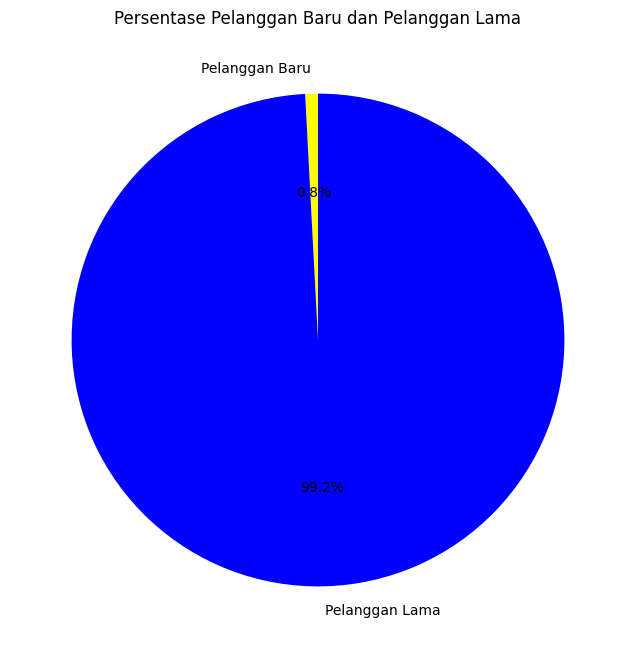

In [ ]:
# Memisahkan pelanggan menjadi dua kelompok berdasarkan lama penggunaan
pelanggan_baru = df[df['lama_pengguna'] <= 30]
pelanggan_lama = df[df['lama_pengguna'] > 30]

# Menghitung jumlah pelanggan dalam masing-masing kelompok
jumlah_pelanggan_baru = len(pelanggan_baru)
jumlah_pelanggan_lama = len(pelanggan_lama)

# Membuat plot pie chart
data = [jumlah_pelanggan_baru, jumlah_pelanggan_lama]
labels = ['Pelanggan Baru', 'Pelanggan Lama']
colors = ['yellow', 'blue']

plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Persentase Pelanggan Baru dan Pelanggan Lama')
plt.show()


In [ ]:
df[df['lama_pengguna'] <= 30]

,customer_id,gender_customer,age,home_location,first_join_date,created_at,product_id,productDisplayName,quantity,item_price,gender_product,masterCategory,subCategory,articleType,baseColour,season,usage,lama_pengguna,customer_status
120,96403,F,30.0,Jawa Barat,2022-07-02,2022-07-02 03:24:13.889166+00:00,59620,FNF Green & Black Wedding Collection Sari,3,188945,Women,Apparel,Saree,Sarees,Green,Summer,Ethnic,29,sudah transaksi
143,49845,F,28.0,Jakarta Raya,2022-07-31,2022-07-31 23:57:19.194557+00:00,53136,Catwalk Women Black Heels,1,184902,Women,Footwear,Shoes,Heels,Black,Winter,Casual,0,sudah transaksi
296,90350,F,24.0,Lampung,2022-07-17,2022-07-19 11:30:01.882941+00:00,43820,Royal Diadem Red Earrings,1,403085,Women,Accessories,Jewellery,Earrings,Red,Summer,Casual,14,sudah transaksi
524,59967,F,28.0,Jawa Tengah,2022-07-09,2022-07-24 04:44:45.952534+00:00,10460,Flying Machine Green Polo Tshirts,1,205332,Men,Apparel,Topwear,Tshirts,Green,Fall,Casual,22,sudah transaksi
696,43753,F,25.0,Kalimantan Tengah,2022-07-16,2022-07-26 19:46:00.896142+00:00,49520,Rocia Women Gold Handbag,1,233592,Women,Accessories,Bags,Handbags,Gold,Summer,Casual,15,sudah transaksi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901694,8478,F,27.0,Bali,2022-07-10,NaT,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,belum transaksi
901763,81041,F,33.0,Lampung,2022-07-24,NaT,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,belum transaksi
901778,75628,M,35.0,Bali,2022-07-16,NaT,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,belum transaksi
901806,49124,F,20.0,Papua,2022-07-17,NaT,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,belum transaksi


In [ ]:
df['age'].max()

69.0

In [ ]:
pelanggan_baru = len(df[df['lama_pengguna'] <= 30])
pelanggan_lama = len(df[df['lama_pengguna'] > 30])

print(f"Jumlah Pelanggan Baru: {pelanggan_baru}")
print(f"Jumlah Pelanggan Lama: {pelanggan_lama}")

Jumlah Pelanggan Baru: 7504
Jumlah Pelanggan Lama: 894375


### **New Customers Not Transacting Distribution**

In [ ]:
len(df[(df['customer_status'] == 'belum transaksi')])

49295

Pelanggan yang belum pernah melakukan transaksi cukup besar yaitu ada 49295 user.

In [ ]:
len(df[(df['lama_pengguna'] <= 30) & (df['customer_status'] == 'belum transaksi')])

1217

In [ ]:
pelanggan_baru_belum_transaksi = len(df[(df['lama_pengguna'] <= 30) & (df['customer_status'] == 'belum transaksi')])

total_pelanggan_baru = len(df[df['lama_pengguna'] <= 30])

persentase_pelanggan_baru_belum_transaksi = (pelanggan_baru_belum_transaksi / total_pelanggan_baru) * 100

print("Total pelanggan baru (lama pengguna <= 30):", total_pelanggan_baru)
print("Persentase pelanggan baru yang belum pernah melakukan transaksi:", persentase_pelanggan_baru_belum_transaksi)

Total pelanggan baru (lama pengguna <= 30): 7504
Persentase pelanggan baru yang belum pernah melakukan transaksi: 16.218017057569295


Jumlah pelanggan baru yang belum pernah melakukan transaksi cukup signifikan, mencapai 16.21%, atau setara dengan 1217 orang, dari total jumlah pengguna baru sebanyak 7504.

Meskipun demikian, sebagian besar pengguna baru juga cukup banyak, di mana mereka baru bergabung selama kurang dari atau sama dengan 30 hari tetapi sudah aktif melakukan transaksi di platform e-commerce ini.

Perlu memperhatikan lebih lanjut pelanggan lama dan baru yang belum melakukan transaksi untuk memahami cara mendorong mereka untuk berbelanja di e-commerce ini.

<ipython-input-45-fb91969b2663>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_belum_transaksi['age_bin'] = pd.cut(user_belum_transaksi['age'], bins=bins)


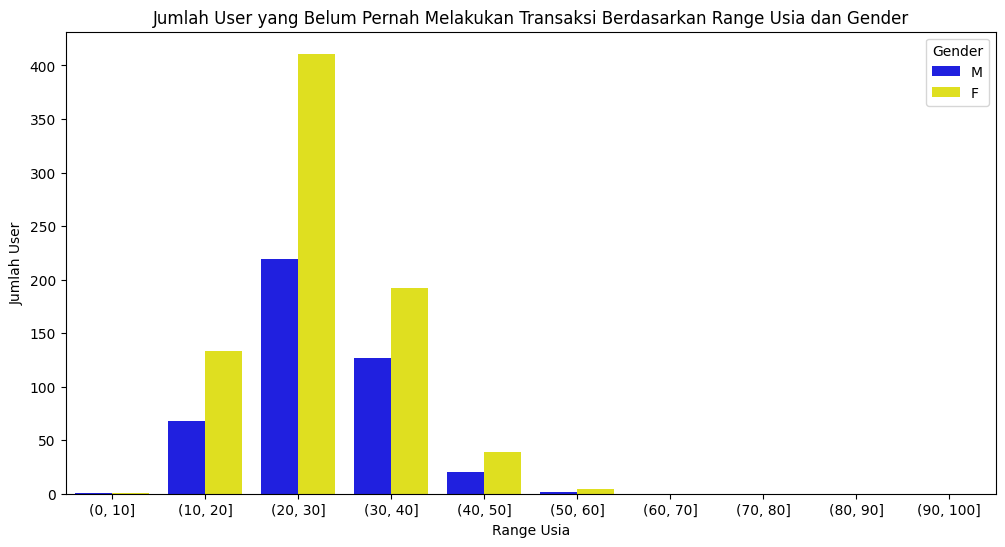

In [ ]:
user_belum_transaksi = df[(df['lama_pengguna'] <= 30) & (df['customer_status'] == 'belum transaksi')]

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

user_belum_transaksi['age_bin'] = pd.cut(user_belum_transaksi['age'], bins=bins)

plt.figure(figsize=(12, 6))
sns.countplot(x='age_bin', hue='gender_customer', data=user_belum_transaksi, palette=['blue', 'yellow'])
plt.title('Jumlah User yang Belum Pernah Melakukan Transaksi Berdasarkan Range Usia dan Gender')
plt.xlabel('Range Usia')
plt.ylabel('Jumlah User')
plt.legend(title='Gender', loc='upper right')
plt.show()

1. Mayoritas pengguna baru yang belum pernah melakukan transaksi berusia antara 10 hingga 40 tahun, terutama dari kelompok usia 20 hingga 30 tahun.
2. Pengguna perempuan mendominasi kategori pengguna baru yang belum pernah melakukan transaksi.
3. Kelompok usia 40 hingga 60 juga mencakup pengguna baru yang belum pernah melakukan transaksi, dengan perempuan mendominasi di dalam kelompok tersebut.

In [ ]:
len(df[(df['lama_pengguna'] <= 30) & (df['customer_status'] == 'sudah transaksi')])

6287

### **Gender Distribution**

In [ ]:
gender_counts = df['gender_customer'].value_counts()
gender_counts

F    575193
M    326686
Name: gender_customer, dtype: int64

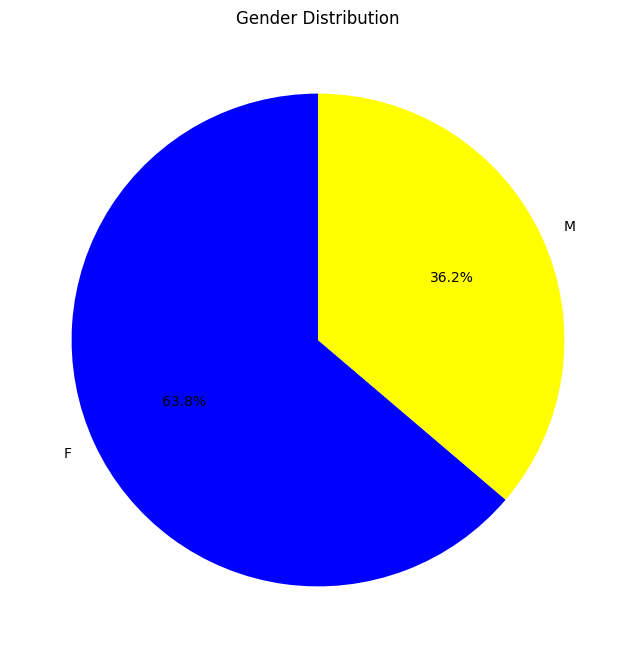

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'yellow'])
plt.title('Gender Distribution')
plt.show()

Mayoritas pengguna di e-commerce ini adalah perempuan, mencapai presentase sebesar 63.8%, sementara pengguna laki-laki menyumbang sekitar 36.2%.

### **Age Distribution**

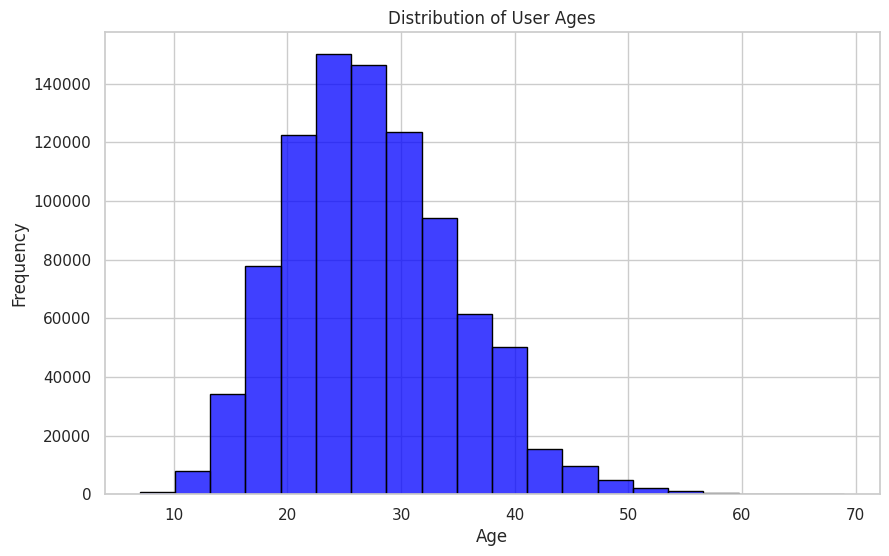

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Membuat histogram distribusi usia menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, color='blue', edgecolor='black', kde=False)

plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Dari distribusi tersebut, terlihat bahwa pengguna di e-commerce menyebar dari usia kurang dari 10 tahun hingga lebih dari 50 tahun.

Dengan mayoritas pengguna berada dalam rentang usia 20 hingga 30 tahun.

### **Location Distribution**

In [ ]:
locationC_counts = df['home_location'].value_counts()
locationC_counts

Jakarta Raya           166024
Jawa Barat             106949
Jawa Tengah            100601
Jawa Timur              86134
Yogyakarta              70275
Kalimantan Barat        48999
Lampung                 47909
Kalimantan Tengah       39153
Kalimantan Selatan      37058
Kalimantan Timur        25078
Maluku                  22858
Kepulauan Riau          18766
Bali                    14450
Sumatera Barat          11795
Nusa Tenggara Barat     11656
Sulawesi Utara          11101
Sumatera Utara           9229
Sulawesi Barat           8683
Sumatera Selatan         7854
Papua                    7251
Papua Barat              6378
Bengkulu                 6178
Sulawesi Selatan         6073
Nusa Tenggara Timur      5317
Gorontalo                3908
Sulawesi Tengah          3750
Maluku Utara             3509
Banten                   3481
Jambi                    3276
Aceh                     2550
Bangka Belitung          2431
Sulawesi Tenggara        1907
Riau                     1298
Name: home

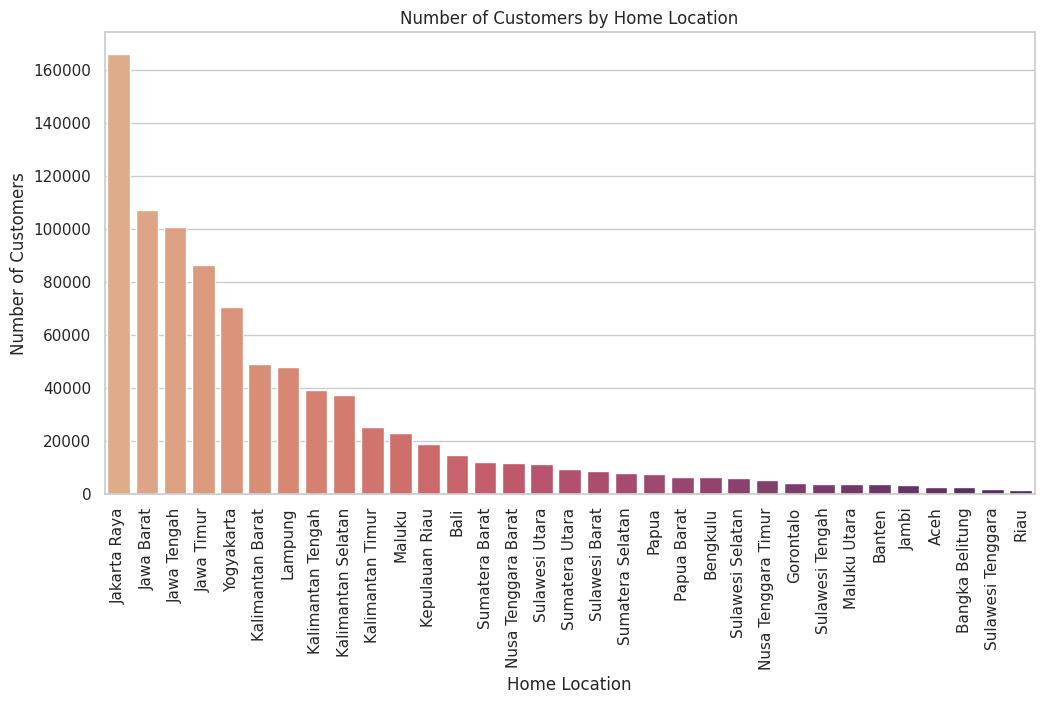

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Membuat countplot untuk jumlah pelanggan berdasarkan lokasi rumah menggunakan Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='home_location',
              order=df['home_location'].value_counts().index,
              palette='flare')

plt.xticks(rotation=90)
plt.xlabel('Home Location')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Home Location')

plt.show()

Berdasarkan gambaran plot, dapat disimpulkan bahwa sebagian besar pelanggan e-commerce berasal dari Jakarta Raya, Jawa Barat, Jawa Tengah, Jawa Timur, dan Yogyakarta.

### **Total Purchase**

In [ ]:
df['quantity'].value_counts()

1     706043
2      68222
3      28112
4      16071
5       9908
6       6680
7       4703
8       3252
9       2360
10      1687
11      1310
12       961
13       725
14       583
15       440
16       337
17       283
18       176
19       172
20       111
21        98
22        61
23        60
24        46
25        35
27        33
26        30
29        15
28        13
33        12
31        10
32         9
34         6
40         4
36         3
35         3
41         3
38         2
48         1
30         1
43         1
37         1
42         1
Name: quantity, dtype: Int64

Sebagian besar pelanggan melakukan transaksi dengan jumlah produk yang tidak terlalu banyak. Mayoritas dari mereka berbelanja dengan jumlah 1-5 produk dalam setiap transaksi.

In [ ]:
df['quantity'].unique()

<IntegerArray>
[   1,    8,    3,    2,    6,    4,    5,    7,   10,    9,   11,   12,   13,
   14,   20,   16,   27,   22,   19,   29,   24,   31,   15,   23,   17,   25,
   18,   21,   34,   26,   33,   28,   38,   36,   40,   35,   32,   48,   30,
   43,   37,   41,   42, <NA>]
Length: 44, dtype: Int64

### **Product Populer**

In [ ]:
# Produk paling banyak terjual
top_products = df.groupby('product_id')['quantity'].sum().sort_values(ascending=False)
topproducts = pd.DataFrame({'Product ID': top_products.index, 'Total Quantity Sold': top_products.values})
topproducts

,Product ID,Total Quantity Sold
0,39731,87
1,13992,86
2,10445,85
3,42953,83
4,2329,82
...,...,...
44441,14729,5
44442,45861,5
44443,10411,5
44444,20780,5


Dari tabel tersebut, dapat disimpulkan bahwa produk dengan ID 39731, 13992, 10445, 42953, dan 2329 merupakan produk yang paling banyak terjual, masing-masing dengan jumlah penjualan 87, 86, 85, 83, dan 82.

Sementara itu, lima produk dengan penjualan terendah, yaitu produk dengan ID 44445, 44444, 44443, 44442, dan 44441, hanya memiliki penjualan sebanyak 5 unit.

### **Most Expensive Product**

In [ ]:
# Produk termahal
singlequantity= df[df['quantity'] == 1]

top_item = singlequantity.groupby('product_id')['item_price'].max().sort_values(ascending=False)
top_item= pd.DataFrame({'Product ID': top_item.index, 'Max Item Price': top_item.values})

top_item.head(10)

,Product ID,Max Item Price
0,45249,1200357
1,10434,1196775
2,18236,1155858
3,38978,1100239
4,33040,1084426
5,51983,1020917
6,53485,1018040
7,46459,1015349
8,4441,1013774
9,51278,1000966


Tabel tersebut menunjukkan top 10 product per item dengan harga paling mahal. Yang mana menduduki posisi pertama ada dari product_id 45249 yang menjadi product paling mahal di e-commerce ini.

### **Revenue Products**

In [ ]:
df['revenue'] = df['item_price'] * df['quantity']
top_rp = df.groupby('product_id')['revenue'].sum().sort_values(ascending=False).head(10).reset_index()
top_rp

,product_id,revenue
0,13992,29385197
1,16804,29068478
2,8237,28177360
3,23954,24248413
4,42953,22931018
5,9343,22906808
6,8221,22679014
7,49568,22267658
8,45608,22230134
9,20150,21871607


Revenue bermanfaat untuk menilai sejauh mana suatu produk atau kategori produk berhasil dalam menghasilkan pendapatan. Dapat juga diperiksa sepuluh produk teratas yang memiliki pendapatan terbesar.

Dari analisis ini, dapat disimpulkan bahwa produk-produk tersebut, yang ditentukan oleh harga per item dan jumlah penjualan, merupakan penyumbang pendapatan terbesar bagi perusahaan.

### **Loyal Customers**

In [ ]:
custtrns = df.groupby('customer_id')['quantity'].count().sort_values(ascending=False)
custtrns.head(10)

customer_id
43202    550
29496    505
82237    503
10167    473
69740    458
38588    436
64659    426
29240    402
95492    401
20143    399
Name: quantity, dtype: int64

Top 10 pelanggan yang sering melakukan transaksi merupakan indikasi bahwa mereka adalah pelanggan yang setia dan layak mendapatkan perhatian lebih. Dengan mempertahankan hubungan baik dengan mereka, perusahaan e-commerce dapat meningkatkan peluang agar pelanggan tersebut tetap berbelanja secara konsisten di platform mereka.

In [ ]:
custtrns = df.groupby('customer_id')['quantity'].sum().sort_values(ascending=False)
custtrns.head(10)

customer_id
43202    828
29496    751
82237    724
64659    655
10167    650
69740    640
52130    622
95492    603
38588    586
29240    578
Name: quantity, dtype: Int64

Berikut adalah top 10 pelanggan yang paling banyak berbelanja di perusahaan e-commerce ini, artinya quantity tiap sekali transaksi banyak serta signifikan melakukan transaksinya.

### **Unique Value**

In [ ]:
df['gender_product'].unique()

array(['Men', 'Women', 'Unisex', 'Girls', 'Boys', nan], dtype=object)

Berikut adalah penjelasan mengenai jenis kelamin (gender) untuk produk yang terdapat dalam dataset e-commerce. Terdapat lima jenis gender produk, yaitu untuk pria, wanita, unisex (produk yang dapat digunakan oleh pria maupun wanita), produk untuk anak perempuan (girls), dan produk untuk anak laki-laki (boys).

In [ ]:
df['masterCategory'].unique()

array(['Footwear', 'Apparel', 'Accessories', 'Personal Care',
       'Free Items', 'Sporting Goods', 'Home', nan], dtype=object)

Dalam dataset e-commerce, terdapat tujuh kategori utama produk, yaitu:

1. **Footwear (Alas Kaki):**
   - Produk yang terkait dengan alas kaki, seperti sepatu dan lainnya.

2. **Apparel (Pakaian):**
   - Produk pakaian.

3. **Accessories (Aksesoris):**
   - Produk aksesoris seperti perhiasan, tas, ikat pinggang, dll.

4. **Personal Care (Perawatan Pribadi):**
   - Produk perawatan pribadi, seperti produk kecantikan atau produk perawatan kulit.

5. **Free Items (Barang Gratis atau Promosi):**
   - Barang-barang gratis atau produk yang diberikan sebagai promosi.

6. **Sporting Goods (Perlengkapan Olahraga):**
   - Produk-produk sejenis keperluan olahraga.

7. **Home (Produk untuk Kebutuhan Rumah Tangga):**
   - Produk untuk kebutuhan rumah tangga.

Perlu dicatat bahwa beberapa pelanggan belum pernah melakukan transaksi sama sekali.

In [ ]:
df['subCategory'].unique()

array(['Shoes', 'Topwear', 'Bags', 'Lips', 'Saree', 'Cufflinks', 'Belts',
       'Jewellery', 'Eyewear', 'Fragrance', 'Loungewear and Nightwear',
       'Innerwear', 'Bottomwear', 'Dress', 'Socks', 'Watches', 'Nails',
       'Ties', 'Headwear', 'Wallets', 'Flip Flops', 'Free Gifts',
       'Sandal', 'Makeup', 'Perfumes', 'Hair', 'Apparel Set', 'Skin',
       'Accessories', 'Stoles', 'Gloves', 'Scarves', 'Vouchers',
       'Skin Care', 'Bath and Body', 'Water Bottle', 'Mufflers',
       'Shoe Accessories', 'Eyes', 'Sports Equipment',
       'Beauty Accessories', 'Sports Accessories', 'Umbrellas',
       'Wristbands', 'Home Furnishing', nan], dtype=object)

Berikut adalah subkategori produk dalam dataset e-commerce, termasuk nilai NaN karena beberapa pelanggan belum pernah melakukan transaksi sama sekali.

In [ ]:
df['articleType'].unique()

array(['Casual Shoes', 'Sweaters', 'Handbags', 'Lip Liner', 'Sarees',
       'Heels', 'Cufflinks', 'Shirts', 'Tshirts', 'Belts', 'Earrings',
       'Jackets', 'Sunglasses', 'Bangle', 'Perfume and Body Mist',
       'Kurtas', 'Lounge Pants', 'Tops', 'Bra', 'Nightdress', 'Trousers',
       'Dresses', 'Sports Shoes', 'Socks', 'Watches', 'Trunk', 'Shorts',
       'Capris', 'Deodorant', 'Nail Polish', 'Backpacks', 'Jeans',
       'Sweatshirts', 'Formal Shoes', 'Ties', 'Caps', 'Wallets',
       'Fragrance Gift Set', 'Clutches', 'Innerwear Vests', 'Flip Flops',
       'Dupatta', 'Messenger Bag', 'Free Gifts', 'Sandals', 'Briefs',
       'Track Pants', 'Leggings', 'Kurtis', 'Pendant', 'Jeggings',
       'Mobile Pouch', 'Tunics', 'Compact', 'Sports Sandals',
       'Foundation and Primer', 'Duffel Bag', 'Jewellery Set', 'Flats',
       'Necklace and Chains', 'Skirts', 'Lipstick', 'Hair Colour',
       'Kurta Sets', 'Face Moisturisers', 'Churidar',
       'Accessory Gift Set', 'Stoles', 'Lip Plu

Itu adalah jenis-jenis penulisan produk di e-commerce ini.

In [ ]:
df['baseColour'].unique()

array(['Black', 'Green', 'Purple', 'Red', 'Brown', 'Steel', 'Maroon',
       'Navy Blue', 'Yellow', 'Grey', 'Gold', 'White', 'Silver', 'Teal',
       'Blue', 'Cream', 'Charcoal', 'Beige', 'Pink', 'Lavender', 'Orange',
       'Khaki', 'Bronze', 'Tan', 'Olive', 'Mustard', 'Peach', 'Burgundy',
       'Turquoise Blue', 'Off White', 'Skin', 'Multi', 'Magenta', 'Nude',
       'Metallic', 'Grey Melange', 'Rust', 'Copper', 'Sea Green',
       'Lime Green', 'Coffee Brown', 'Taupe', 'Mauve', 'Mushroom Brown',
       'Rose', 'Fluorescent Green', nan], dtype=object)

Berikut tipe-tipe warna dasar (base color) dari setiap produk dalam dataset e-commerce.

In [ ]:
df['season'].value_counts()

Summer    412705
Fall      218863
Winter    163748
Spring     57268
Name: season, dtype: int64

Produk pada umumnya dikategorikan berdasarkan musim penggunaannya, dan dapat terlihat bahwa penjualan paling tinggi terjadi pada produk dengan musim summer dan fall. Hal ini menunjukkan bahwa banyak produk yang lebih diminati atau dibutuhkan oleh pelanggan selama musim panas dan gugur, menciptakan tren penjualan yang signifikan pada kedua musim tersebut.

In [ ]:
df['usage'].value_counts()

Casual          666749
Sports           76951
Ethnic           61520
Formal           44920
Smart Casual      1292
Party              589
Travel             551
Home                12
Name: usage, dtype: int64

Produk yang paling banyak terjual dapat dikaitkan dengan kegunaannya dan terkategorikan dalam beberapa kategori, termasuk produk casual, sports, ethnic, dan formal. Ini menunjukkan bahwa produk dengan fungsionalitas yang beragam dan cocok untuk berbagai keperluan dan acara memiliki popularitas tinggi di antara pelanggan.

### **Total Transactions**

#### **By periods**

In [ ]:
df['Period'] = pd.to_datetime(df['created_at']).dt.to_period("M")

transactions_per_period = df['Period'].value_counts().sort_index().reset_index()
transactions_per_period.columns = ['Period', 'Transaction Count']

transactions_per_period

<ipython-input-66-98e950bae3f7>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Period'] = pd.to_datetime(df['created_at']).dt.to_period("M")


,Period,Transaction Count
0,2016-06,1
1,2016-07,296
2,2016-08,547
3,2016-09,717
4,2016-10,989
...,...,...
69,2022-03,28801
70,2022-04,29237
71,2022-05,30084
72,2022-06,28587


#### **All Periods**

<ipython-input-67-d52d1650fb38>:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_valid_created_at['Period'] = pd.to_datetime(df_valid_created_at['created_at']).dt.to_period("M")
<ipython-input-67-d52d1650fb38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_created_at['Period'] = pd.to_datetime(df_valid_created_at['created_at']).dt.to_period("M")


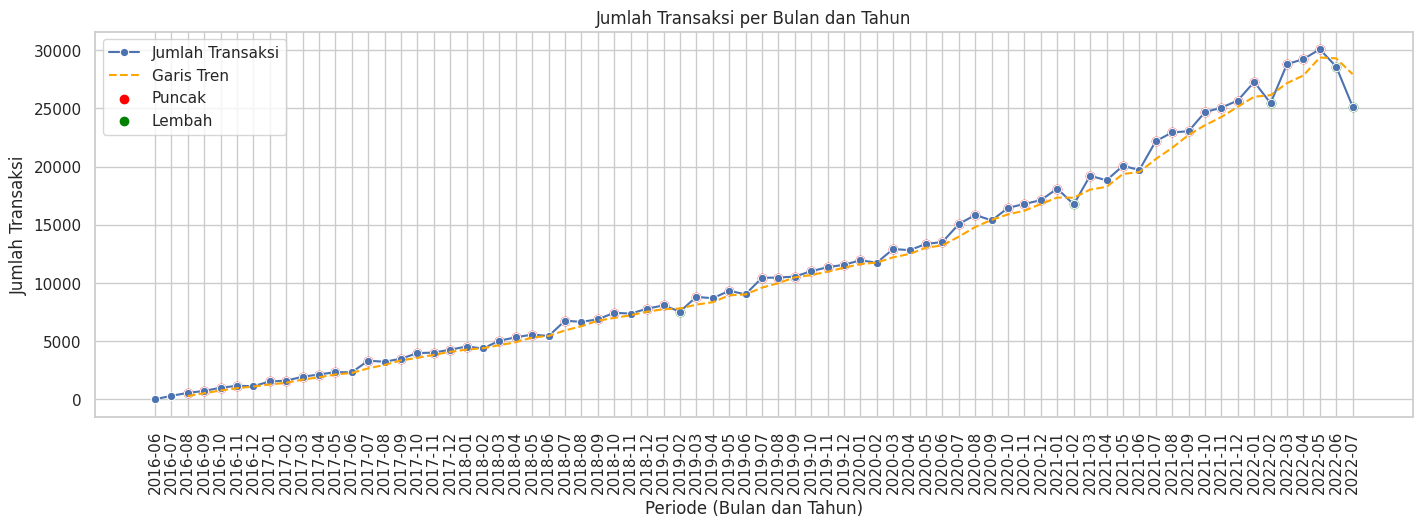

In [ ]:
# Filter transaksi yang memiliki nilai pada kolom 'created_at'
df_valid_created_at = df.dropna(subset=['created_at'])

df_valid_created_at['Period'] = pd.to_datetime(df_valid_created_at['created_at']).dt.to_period("M")
transactions_per_period = df_valid_created_at['Period'].value_counts().sort_index()

df_transactions = pd.DataFrame({
    'Period': transactions_per_period.index.astype(str),
    'Transaction_Count': transactions_per_period.values
})

df_transactions['Trend'] = df_transactions['Transaction_Count'].rolling(window=3).mean()

df_transactions['Peak'] = df_transactions['Transaction_Count'] == df_transactions['Transaction_Count'].rolling(window=3).max()
df_transactions['Trough'] = df_transactions['Transaction_Count'] == df_transactions['Transaction_Count'].rolling(window=3).min()

plt.figure(figsize=(17, 5))
sns.lineplot(data=df_transactions, x='Period', y='Transaction_Count', label='Jumlah Transaksi', marker='o')
sns.lineplot(data=df_transactions, x='Period', y='Trend', label='Garis Tren', linestyle='--', color='orange')
plt.scatter(df_transactions[df_transactions['Peak']]['Period'], df_transactions[df_transactions['Peak']]['Transaction_Count'], color='red', label='Puncak')
plt.scatter(df_transactions[df_transactions['Trough']]['Period'], df_transactions[df_transactions['Trough']]['Transaction_Count'], color='green', label='Lembah')

plt.title('Jumlah Transaksi per Bulan dan Tahun')
plt.xlabel('Periode (Bulan dan Tahun)')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=90)
plt.legend()
plt.show()

<ipython-input-68-e5fe00ed5c86>:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  loyal_customer_data['Period'] = loyal_customer_data['created_at'].dt.to_period("M")
<ipython-input-68-e5fe00ed5c86>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loyal_customer_data['Period'] = loyal_customer_data['created_at'].dt.to_period("M")
<ipython-input-68-e5fe00ed5c86>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loyal_customer_data['Total Sales'] = loyal_customer_

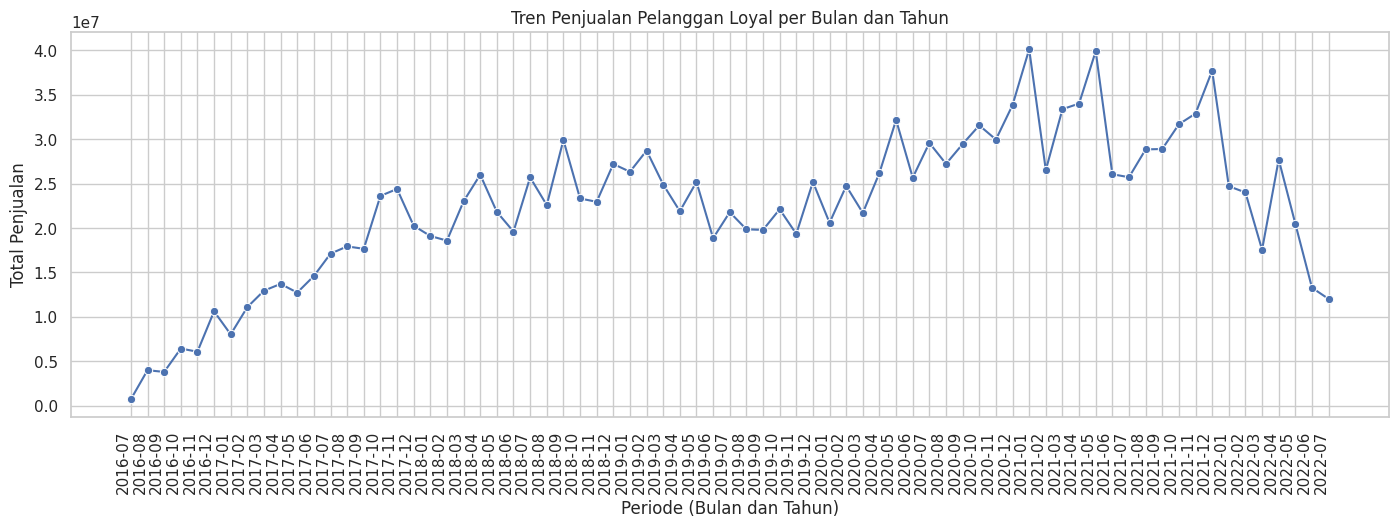

In [ ]:
# Mengidentifikasi pelanggan loyal (top 10)
top_customer_transactions = df.groupby('customer_id')['created_at'].count().sort_values(ascending=False)
top_loyal_customers = top_customer_transactions.head(10).index

# Memfilter data untuk pelanggan loyal
loyal_customer_data = df[df['customer_id'].isin(top_loyal_customers)]

# Menambahkan kolom 'Period' untuk keperluan analisis berdasarkan bulan dan tahun
loyal_customer_data['Period'] = loyal_customer_data['created_at'].dt.to_period("M")

# Menambahkan kolom 'Total Sales'
loyal_customer_data['Total Sales'] = loyal_customer_data['quantity'] * loyal_customer_data['item_price']

transactions_per_month_loyal = loyal_customer_data.groupby('Period')['Total Sales'].sum()

# Plotting
plt.figure(figsize=(17, 5))
sns.lineplot(x=transactions_per_month_loyal.index.astype(str), y=transactions_per_month_loyal.values, marker='o')
plt.title('Tren Penjualan Pelanggan Loyal per Bulan dan Tahun')
plt.xlabel('Periode (Bulan dan Tahun)')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90, ha='right')
plt.show()

Dataset transaksi dari bulan ke 6 tahun 2016 hingga bulan ke-7 tahun 2022. Jumlah transaksi cenderung naik seiring bertambahnya bulan dan tahun. Namun terjadi pula penurunan jumlah transaksi. Seperti jumlah penurunan transaksi yang sangat ekstrim di bulan ke-6 dan ke-7 tahun 2022. Namun ditahun itu juga jumlah transaksi terbesar terjadi, jika dibandingkan dengan bulan dan tahun tahun sebelumnya. Namun dalam konteks e-commerce yang mana sudah berjalan dari tahun 2016, penurunan ini merupakan masalah besar yang harus di atas sesegera mungkin.

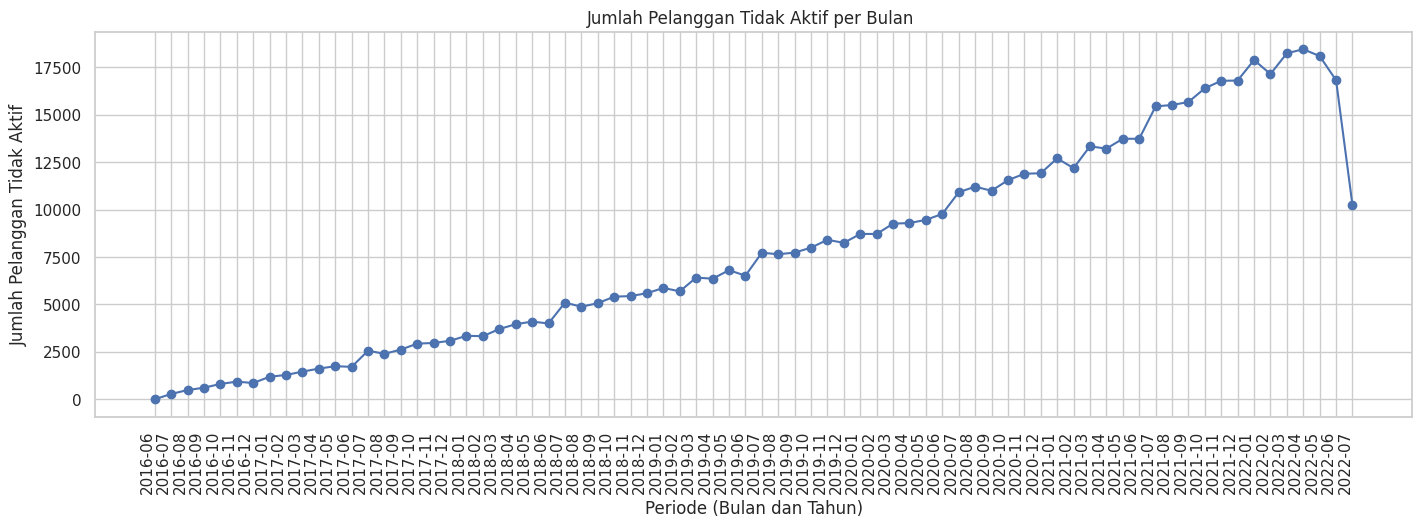

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mengonversi 'Period' menjadi format period yang sesuai
df['Period'] = df['Period'].dt.to_timestamp(freq='M').dt.to_period("M")

# Menentukan periode cutoff sampai Juli 2022
cutoff_period = pd.Period('2022-07')

# Menyesuaikan filter hanya pada data sebelum cutoff_period
filtered_data = df[df['Period'] <= cutoff_period]

# Menghitung jumlah pelanggan yang tidak aktif setiap bulan
inactive_customers_per_month = filtered_data.groupby(['Period'])['customer_id'].nunique()

# Membuat line chart
plt.figure(figsize=(17, 5))
plt.plot(inactive_customers_per_month.index.astype(str), inactive_customers_per_month.values, marker='o')
plt.title('Jumlah Pelanggan Tidak Aktif per Bulan ')
plt.xlabel('Periode (Bulan dan Tahun)')
plt.ylabel('Jumlah Pelanggan Tidak Aktif')
plt.xticks(rotation=90, ha='right')
plt.show()


Pada bulan 3 dan 7 cenderung naik jumlah penjualanya, dan seperti terjadi tren pada bulan bulan itu. Apabila dilihat dari tahun tahun sebelumnya(sebelum tahun 2022). Dan ini memang bisa terjadi, karena bulan tersebut berhubungan dengan waktu menyambut bulan Ramadhan dan lebaran. Bulan 3 biasanya diidentifikasi karena menyambut bulan ramadhan dan lebaran, sedangkan bulan 7 diidentifikasi waktu waktu puncak liburan. Dan sangat mungkin apabila hal-hal ini menyebabkan banyak orang yang berbelanja.

Pada bulan juli 2022 terjadi penurunan jumlah penjualan, dan ini seperti apa yang dalam prediksi Bank Indonesia. Yang mengatakan bahwa “Penurunan penjualan pada Juli dan Oktober 2022 diprakirakan karena tertahannya permintaan masyarakat disertai dengan keadaan cuaca yang kurang mendukung,”

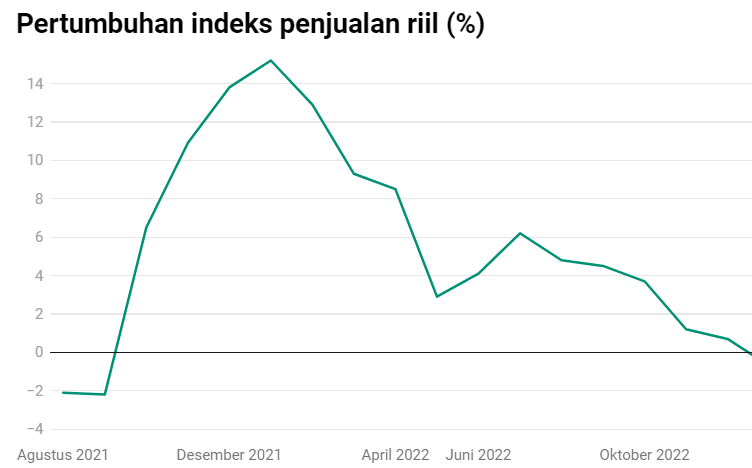

Berumber dari CNBC Indonesia, pertumbuhan indeks penjualan riil pada tahun 2022 juga menurun. Namun perlu ditelaah lebih dalam, selain faktor eksternal tersebut, apakah ada faktor internal yang memang berdampak besar pada penurunan jumlah penjulan di tahun 2022, terutama di bulan maret yang biasanya trenya naik, dan bulan juni dan juli yang menunjukkan penurunan penjualan yang drastis.

In [ ]:
cust = df[df['created_at'].notnull()].copy()
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   customer_id         852584 non-null  Int64              
 1   gender_customer     852584 non-null  object             
 2   age                 852584 non-null  float64            
 3   home_location       852584 non-null  object             
 4   first_join_date     852584 non-null  datetime64[ns]     
 5   created_at          852584 non-null  datetime64[ns, UTC]
 6   product_id          852584 non-null  Int64              
 7   productDisplayName  852584 non-null  object             
 8   quantity            852584 non-null  Int64              
 9   item_price          852584 non-null  Int64              
 10  gender_product      852584 non-null  object             
 11  masterCategory      852584 non-null  object             
 12  subCategory     


Identifikasi faktor internal dari fenomena penurunan jumlah transaksi yang ekstrim di tahun 2022, dilakukan melalui identifikasi churn pelanggan.

### **Identification of Churn Customers**


Churn pelanggan adalah fenomena dimana pelanggan yang sebelumnya berbelanja di e-commerce kita, kini berpindah ke lain tempat untuk berbelanja, dan memilih untuk tidak berlangganan lagi di e-commerce ini. Ini dapat disebabkan banyak hal, mungkin pelayanan yang semakin memburuk, atau harga cenderung naik, atau biaya-baiaya tambahan saat melakukan chekcout atau mungkin ada tawaran yang lebih baik dari e-commerce lain. Mungkin bisa digali lebih dalam penyebab churn pelanggan ini. Dan penyebabnya pun bisa sangat bervariasi. Namun di kasus ini, kita hanya berforkus pada identifikasi churn pelanggan.

Identifikasi churn dihitung mulai dari terakhir kali customer berbelanja hingga 1 tahun terkahir.

In [ ]:
df['last_transaction_date'] = df.groupby('customer_id')['created_at'].transform('max')

In [ ]:
end_date = df['last_transaction_date'].max()
start_date = end_date - timedelta(days=365)

In [ ]:
# Pelanggan yang tidak melakukan transaksi selama satu tahun
churn_users = df[df['last_transaction_date'] < start_date]['customer_id'].unique()

# Hitung jumlah pelanggan yang churn per tahun
churn_per_year = df[df['customer_id'].isin(churn_users)].groupby(df['created_at'].dt.year)['customer_id'].nunique()

In [ ]:
churn_per_year.loc[2022] = df[df['created_at'].dt.year == 2022]['customer_id'].nunique()
churn_per_year

created_at
2016.0      988
2017.0     2542
2018.0     3403
2019.0     4491
2020.0     5276
2021.0     4194
2022.0    32828
Name: customer_id, dtype: int64

Ternyata benar bahwa churn banyak terjadi, apalagi terjadi kenaikan jumlah churn yang sangat tinggi di tahun 2022, Bahkan saat record data ditahun 2022 baru sampai bulan juli.

Fenomena churn tentunya akan sangat merugikan perusahaan apabila tidak segera ditangani. Churn terjadi karena faktor yang sangat mungkin terjadi adalah karena perusahaan gagal untuk memahami preferensi customernya. Perusahaan gagal memahami terkait apa yang disukai dan minati customerya, begitu juga sebaliknya. Padahal churn bisa dicegah dengan memberi pelayanan dan tawaran yang lebih baik kepada pelanggan yang akan churn. Maka dari itu, untuk mengatasi fenomena ini dan membantu perusahaan meningkatkan penjualanya lagi, kami membuat model product recommendation. Yang mana menawarkan produk-produk yang sesuai dengan preferensi customer.

In [ ]:
half_year_ago = df['last_transaction_date'].max() - timedelta(days=182)

churn_users = df[df['last_transaction_date'] < half_year_ago]['customer_id'].unique()

df['churn'] = df['customer_id'].isin(churn_users)
df['Period_Half_Year'] = (df['Period'].dt.month - 1) // 6
churn_per_half_year = df.groupby(['Period_Half_Year', df['Period'].dt.year])['churn'].sum().unstack().fillna(0)

churn_per_half_year = churn_per_half_year[churn_per_half_year.index >= 0]
churn_per_half_year

Period,-1,2016,2017,2018,2019,2020,2021,2022
Period_Half_Year,,,,,,,,
0,0,1,1629,2672,3925,5466,6901,1807
1,0,1359,2543,3869,5484,6832,7303,0


Apabila identifikasinya per setengah tahun untuk mengklasifikasikan pelanggan churn atau tidak, juga masuk akal apabil di tahun 2022 penjualan menurun. Karena terjadi peningkatan jumlah churn di tahun tahun sebelumnya. Yang mana pelanggan-pelanggan sudah berpindah, maka dari itu penjualan menurun di tahun 2022.

In [ ]:
import pandas as pd
from datetime import timedelta

# Mengonversi 'Period' menjadi format period yang sesuai
df['Period'] = df['Period'].dt.to_timestamp(freq='M').dt.to_period("M")

# Menentukan periode cutoff 6 bulan yang lalu dari periode maksimum
half_year_ago = df['last_transaction_date'].max() - timedelta(days=182)

# Mengidentifikasi pelanggan yang churn
churn_users = df[df['last_transaction_date'] < half_year_ago]['customer_id'].unique()

# Menambahkan kolom 'churn' dan 'Period_Quarter'
df['churn'] = df['customer_id'].isin(churn_users)
df['Period_Quarter'] = df['Period'].dt.to_timestamp(freq='Q').dt.to_period("Q")

# Menghitung jumlah churn per quarter
churn_per_quarter = df.groupby(['Period_Quarter', df['Period_Quarter'].dt.year])['churn'].sum().unstack().fillna(0)

# Menampilkan hasil
churn_per_quarter

Period_Quarter,2016,2017,2018,2019,2020,2021,2022
Period_Quarter,,,,,,,
2016Q2,1,0,0,0,0,0,0
2016Q3,632,0,0,0,0,0,0
2016Q4,727,0,0,0,0,0,0
2017Q1,0,838,0,0,0,0,0
2017Q2,0,791,0,0,0,0,0
2017Q3,0,1316,0,0,0,0,0
2017Q4,0,1227,0,0,0,0,0
2018Q1,0,0,1319,0,0,0,0
2018Q2,0,0,1353,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901879 entries, 0 to 901878
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   customer_id            901879 non-null  Int64              
 1   gender_customer        901879 non-null  object             
 2   age                    901879 non-null  float64            
 3   home_location          901879 non-null  object             
 4   first_join_date        901879 non-null  datetime64[ns]     
 5   created_at             852584 non-null  datetime64[ns, UTC]
 6   product_id             852584 non-null  Int64              
 7   productDisplayName     852584 non-null  object             
 8   quantity               852584 non-null  Int64              
 9   item_price             852584 non-null  Int64              
 10  gender_product         852584 non-null  object             
 11  masterCategory         852584 non-null 

In [ ]:
df['age'] = pd.to_numeric(df['age']).astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901879 entries, 0 to 901878
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   customer_id            901879 non-null  Int64              
 1   gender_customer        901879 non-null  object             
 2   age                    901879 non-null  Int64              
 3   home_location          901879 non-null  object             
 4   first_join_date        901879 non-null  datetime64[ns]     
 5   created_at             852584 non-null  datetime64[ns, UTC]
 6   product_id             852584 non-null  Int64              
 7   productDisplayName     852584 non-null  object             
 8   quantity               852584 non-null  Int64              
 9   item_price             852584 non-null  Int64              
 10  gender_product         852584 non-null  object             
 11  masterCategory         852584 non-null 

In [ ]:
# Simpan hasil ke csv
df.to_csv('Final_new20231129.csv', index=False)

In [ ]:
# Simpan hasil ke csv
# df.to_csv('Final_20231129.csv', index=False)

# **IV. Modeling**

## **Demographic Filtering**

Demographic Filtering: Filter -> Scoring -> Sort

Metode ini digunakan untuk memberikan rekomendasi kepada pengguna berdasarkan produk yang paling populer (paling banyak terjual) di e-commerce ini.

Pendekatan ini diterapkan pada pengguna yang belum pernah melakukan transaksi sama sekali. Oleh karena itu, merekomendasikan produk yang populer dianggap sebagai pendekatan yang tepat karena kita belum mengetahui preferensi dari pengguna-pengguna tersebut.

### **Sorting for New User**

In [ ]:
# Mengelompokkan produk berdasarkan 'product_id' dan menghitung total kuantitas yang terjual
top_products = (
    df.groupby('product_id')['quantity'].sum()
    .sort_values(ascending=False)
    .reset_index(name='Total Quantity Sold')
)

# Menggabungkan hasil perhitungan dengan informasi produk yang unik
top_products = top_products.merge(
    df[['product_id', 'masterCategory', 'subCategory', 'articleType',
        'baseColour', 'season', 'usage', 'productDisplayName']]
    .drop_duplicates(),
    on='product_id',
    how='left'
)

In [ ]:
# Menampilkan 10 produk teratas
top_products.head(10)

,product_id,Total Quantity Sold,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
0,39731,87,Apparel,Bottomwear,Skirts,Grey,Summer,Formal,Arrow Woman Grey Skirt
1,13992,86,Footwear,Shoes,Sports Shoes,Grey,Fall,Sports,Puma Women Body Train Grey Sports Shoes
2,10445,85,Apparel,Bottomwear,Jeans,Blue,Fall,Casual,Flying Machine Men Midrise Blue Jeans
3,42953,83,Accessories,Belts,Belts,Black,Summer,Casual,French Connection Men Black Leather Belt
4,2329,82,Apparel,Topwear,Tshirts,Grey,Fall,Casual,Reebok Men Force India Grey T-shirt
5,8828,80,Apparel,Topwear,Shirts,White,Fall,Casual,Spykar Men Ranger Yellow N Blue Stripes White ...
6,17369,79,Accessories,Accessories,Accessory Gift Set,Purple,Fall,Formal,Arrow Men Formal Purple Tie+Cufflink+Pocket sq...
7,58001,77,Apparel,Dress,Dresses,Black,Fall,Casual,Latin Quarters Women Black Printed Dress
8,25774,77,Apparel,Topwear,Suspenders,Beige,Summer,Formal,Lino Perros Men Beige Suspenders
9,8729,76,Apparel,Topwear,Shirts,Green,Fall,Casual,Indigo Nation Men Checks Blue Shirt


Berikut adalah rekomendasi produk yang paling umum, di mana memberikan rekomendasi kepada pengguna yang belum pernah melakukan transaksi, berdasarkan produk yang paling banyak terjual di e-commerce ini dari data awal hingga tahun 2022.

### **Filtering for More Personal**

Rekomendasi yang lebih difilter untuk menjadi lebih personal. Rekomendasi ini didasarkan pada input gender, periode yang diinginkan, masterCategory, dan jumlah produk rekomendasi yang diinginkan untuk ditampilkan.

Berikut adalah tampilan rekomendasi produk untuk pengguna yang belum pernah melakukan transaksi dan berstatus wanita. Rekomendasi ini mencakup apparel yang paling populer pada periode bulan Mei 2022.

In [ ]:
cross_table = pd.crosstab(df['customer_status'], df['gender_customer'], normalize='index') * 100
cross_table

gender_customer,F,M
customer_status,,
belum transaksi,64.270210,35.729790
sudah transaksi,63.748675,36.251325


Jika melihat data, mayoritas pengguna yang belum pernah melakukan transaksi ternyata berasal dari kalangan perempuan. Oleh karena itu, mungkin kita dapat melakukan personalisasi dengan menerapkan filtrasi demografis khusus untuk perempuan.

In [ ]:
gender = ['Women', 'Men']
period = [pd.Period('2022-05')]
masterCategory = ['Apparel']
topk = 20

In [ ]:
df_demog = df[(df['gender_product'].isin(gender)) &
              (df['Period'].isin(period)) &
              (df['masterCategory'].isin(masterCategory))]

In [ ]:
# Menggunakan metode nlargest untuk mendapatkan 20 produk teratas berdasarkan quantity
result = (
    df_demog
    .nlargest(topk, 'quantity')
    [['product_id', 'masterCategory', 'subCategory', 'articleType',
      'baseColour', 'season', 'usage', 'productDisplayName', 'item_price']])

In [ ]:
total_sold = df_demog.groupby('product_id')['quantity'].sum().reset_index()
total_sold.columns = ['product_id', 'total_sold']

result = result.merge(total_sold, on='product_id', how='left')
result_sorted = result.sort_values(by='total_sold', ascending=False)

result_sorted

,product_id,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,item_price,total_sold
1,18261,Apparel,Topwear,Kurtas,Blue,Fall,Ethnic,Aneri Women Anshu Blue Kurta,173189,42
0,13088,Apparel,Topwear,Tshirts,Red,Fall,Sports,ADIDAS Men NBA Bold Red T-shirts,140971,33
2,23975,Apparel,Topwear,Shirts,Brown,Fall,Formal,Peter England Men Brown Striped Shirt,188653,27
3,40667,Apparel,Topwear,Tops,Red,Summer,Casual,Lee Women Red Top,122269,26
4,30341,Apparel,Topwear,Tshirts,Off White,Summer,Casual,Myntra Men Fakebook Off White T-shirt,325175,25
6,44859,Apparel,Topwear,Tshirts,Black,Summer,Casual,Puma Men Black Ferrari Polo T-shirt,577035,23
7,29580,Apparel,Topwear,Tshirts,Red,Summer,Casual,Puma Men Red T-shirt,112044,23
5,51501,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Denizen Women Blue Jeans,105509,22
12,6472,Apparel,Topwear,Tshirts,White,Summer,Casual,ADIDAS Wmen's Free Soul White T-shirt,256928,20
8,40373,Apparel,Topwear,Tops,White,Summer,Casual,Tokyo Talkies Women White Top,291460,20


### **ML Engineering: Demographic Filtering**

In [ ]:
# membuat model Demographic Filtering
class RecommenderSystem:
    def __init__(self, df):
        self.df_demog = df.copy()

    def recommend(self, gender=None, period=None, masterCategory=None, topk=20):
        df = self.demographic_filter(self.df_demog, gender=gender, period=period,
                                     masterCategory=masterCategory)

        total_sold = df.groupby('product_id')['quantity'].sum().reset_index()
        total_sold.columns = ['product_id', 'total_sold']

        result = df.nlargest(topk, 'quantity')[['product_id', 'masterCategory',
                                                'subCategory', 'articleType',
                                                'baseColour', 'season', 'usage',
                                                'productDisplayName']]
        result = result.merge(total_sold, on='product_id', how='left')

        result.sort_values(by='total_sold', ascending=False, inplace=True)

        return result

    def demographic_filter(self, df, gender=None, period=None,
                           masterCategory=None):
        df = df.copy()
        if gender is not None:
            df = df[(df['gender_product'].isin([gender]))]
        if period is not None:
            period_date = datetime.strptime(period, "%Y-%m")
            df = df[(df['Period'].dt.year == period_date.year) & (df['Period'].dt.month == period_date.month)]
        if masterCategory is not None:
            df = df[df['masterCategory'].isin(masterCategory)]
        return df

# melakukan fit model Demographic Filtering
recsys1 = RecommenderSystem(df_demog)

**Untuk Pria**

In [ ]:
recsys1.recommend(gender='Men', period=None, masterCategory=['Apparel'])

,product_id,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,total_sold
0,13088,Apparel,Topwear,Tshirts,Red,Fall,Sports,ADIDAS Men NBA Bold Red T-shirts,33
1,23975,Apparel,Topwear,Shirts,Brown,Fall,Formal,Peter England Men Brown Striped Shirt,27
2,30341,Apparel,Topwear,Tshirts,Off White,Summer,Casual,Myntra Men Fakebook Off White T-shirt,25
3,44859,Apparel,Topwear,Tshirts,Black,Summer,Casual,Puma Men Black Ferrari Polo T-shirt,23
4,29580,Apparel,Topwear,Tshirts,Red,Summer,Casual,Puma Men Red T-shirt,23
8,27525,Apparel,Topwear,Jackets,Olive,Summer,Casual,Scullers Men Olive Jacket,20
9,11349,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Lee Men Blue Chicago Fit Jeans,20
15,43047,Apparel,Topwear,Tshirts,Blue,Summer,Sports,Nike Men Blue Energy Jersey,20
5,5962,Apparel,Topwear,Shirts,Red,Summer,Casual,Highlander Men Solid Poplin Red Shirts,19
6,3107,Apparel,Topwear,Tshirts,Black,Summer,Casual,Probase Men's Cheap Fast & Easy Black T-shirt,18


**Untuk Wanita**

In [ ]:
recsys1.recommend(gender='Women', period=None, masterCategory=['Apparel'])

,product_id,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,total_sold
0,18261,Apparel,Topwear,Kurtas,Blue,Fall,Ethnic,Aneri Women Anshu Blue Kurta,42
1,40667,Apparel,Topwear,Tops,Red,Summer,Casual,Lee Women Red Top,26
2,51501,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Denizen Women Blue Jeans,22
3,40373,Apparel,Topwear,Tops,White,Summer,Casual,Tokyo Talkies Women White Top,20
6,6472,Apparel,Topwear,Tshirts,White,Summer,Casual,ADIDAS Wmen's Free Soul White T-shirt,20
4,34957,Apparel,Saree,Sarees,Beige,Summer,Ethnic,Fabindia Beige Jaipur Print Cotton Sari,19
12,24153,Apparel,Topwear,Kurtas,Black,Fall,Ethnic,Aurelia Women Black Printed Kurta,19
5,47066,Apparel,Bottomwear,Patiala,Teal,Fall,Ethnic,Shree Women Teal Printed Patiala,18
14,55786,Apparel,Loungewear and Nightwear,Nightdress,Black,Summer,Casual,SDL by Sweet Dreams Women Black Nightdress,17
7,11355,Apparel,Topwear,Tops,Black,Fall,Casual,United Colors Of Benetton Women Light Winter B...,17


## **Content-Based Filtering**

Content-Based Filtering adalah metode rekomendasi produk yang dibangun berdasarkan riwayat pembelian barang oleh pelanggan. Rekomendasi produk diberikan berdasarkan kesamaan dengan produk yang telah dibeli oleh pelanggan sebelumnya. Harapannya, pelanggan akan tertarik untuk membeli lagi, mungkin karena ada opsi dengan harga yang berbeda atau layanan tambahan yang dapat mereka nikmati.

Karena metode ini berfokus pada produk yang telah dibeli oleh pelanggan sebelumnya, rekomendasi ini ditujukan untuk pelanggan yang telah melakukan transaksi sebelumnya. Oleh karena itu, data disaring berdasarkan pelanggan yang sudah pernah melakukan transaksi.

Misalnya, jika seorang pelanggan baru saja membeli produk dengan `product_id` tertentu, maka produk yang memiliki kesamaan akan direkomendasikan. Dalam konteks ini, kita mengasumsikan kesamaan produk berdasarkan kemiripan informasi dalam fitur seperti `masterCategory`, `subCategory`, `gender_product`, `articleType`, `baseColour`, `season`, `usage`, dan `productDisplayName`.


### **Based Model**

In [ ]:
cbf = df[df['created_at'].notnull()].copy()

In [ ]:
# Pilih fitur yang akan diikutsertakan dalam grup dan jumlah 'quantity'
agg_features = {
    'quantity': 'sum',
    'masterCategory': 'first',
    'subCategory': 'first',
    'gender_product': 'first',
    'articleType': 'first',
    'baseColour': 'first',
    'season': 'first',
    'usage': 'first',
    'productDisplayName': 'first'
}

filtered_df = cbf.groupby('product_id', as_index=False).agg(agg_features)

selected_features = ['masterCategory', 'subCategory', 'gender_product',
                     'articleType', 'baseColour', 'season', 'usage',
                     'productDisplayName']

filtered_df['combined_features'] = filtered_df[selected_features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [ ]:
fbc = filtered_df[['product_id', 'combined_features']].copy()

In [ ]:
product_id = 39731

Misal customer baru saja membeli produk dengan product_id tersebut. Maka akan direkomendasikan produk yang memiliki kesamaan dengan produk tersebut. Dalam konteks ini kita mengasumsikan kesamaan produk berdasarkan kemiripan informasi yang ada dalam fitur masterCategory',
'subCategory', 'gender_product', 'articleType', 'baseColour', 'season', 'usage', 'productDisplayName'.

In [ ]:
content = fbc.loc[product_id, 'combined_features']
content

'Accessories Bags Women Handbags Green Summer Casual Kiara Women Green Handbag'

In [ ]:
bow = CountVectorizer(stop_words='english', tokenizer=word_tokenize)
bank = bow.fit_transform(fbc.combined_features)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
code = bow.transform([content])
code

<1x8923 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [ ]:
dist = cosine_distances(code, bank)
dist

array([[0.93333333, 1.        , 0.92838851, ..., 0.69570969, 0.66666667,
        0.73333333]])

In [ ]:
rec_product_id = dist.argsort()[0, 1:11]
rec_product_id

array([39731, 39901, 39724, 39715, 22066, 40070, 39758, 23005, 23007,
       23003])

In [ ]:
filtered_df.loc[rec_product_id]

,product_id,quantity,masterCategory,subCategory,gender_product,articleType,baseColour,season,usage,productDisplayName,combined_features
39731,53673,21,Accessories,Bags,Women,Handbags,Green,Summer,Casual,Kiara Women Green Handbag,Accessories Bags Women Handbags Green Summer C...
39901,53893,48,Accessories,Bags,Women,Handbags,Green,Summer,Casual,Kiara Women Green Handbag,Accessories Bags Women Handbags Green Summer C...
39724,53666,28,Accessories,Bags,Women,Handbags,Green,Summer,Casual,Kiara Women Green Handbag,Accessories Bags Women Handbags Green Summer C...
39715,53654,45,Accessories,Bags,Women,Handbags,Green,Summer,Casual,Kiara Women Green Handbag,Accessories Bags Women Handbags Green Summer C...
22066,28444,42,Accessories,Bags,Women,Handbags,Green,Summer,Casual,Kiara Women Green Handbag,Accessories Bags Women Handbags Green Summer C...
40070,54182,18,Accessories,Bags,Women,Handbags,Green,Summer,Casual,Kiara Women Green Handbag,Accessories Bags Women Handbags Green Summer C...
39758,53720,25,Accessories,Bags,Women,Handbags,Green,Summer,Casual,Kiara Women Green Handbag,Accessories Bags Women Handbags Green Summer C...
23005,29735,35,Accessories,Bags,Women,Handbags,Green,Summer,Casual,Kiara Women Light Green Handbag,Accessories Bags Women Handbags Green Summer C...
23007,29737,36,Accessories,Bags,Women,Handbags,Green,Summer,Casual,Kiara Women Leatherette Green Handbag,Accessories Bags Women Handbags Green Summer C...
23003,29733,26,Accessories,Bags,Women,Handbags,Green,Summer,Casual,Kiara Women Leatherette Green Handbag,Accessories Bags Women Handbags Green Summer C...


In [ ]:
result_cbf = filtered_df.loc[rec_product_id]

In [ ]:
# Menambahkan kolom untuk menghitung jumlah kata yang berbeda antara dua teks
result_cbf['different_word_count'] = result_cbf['combined_features'].apply(
    lambda x: sum(1 for item in difflib.ndiff(word_tokenize(content),
                                              word_tokenize(x)) if item[0] != ' '))

# Memfilter produk dengan kata yang berbeda
different_products = result_cbf[result_cbf['different_word_count'] > 0]

# Memfilter produk tanpa kata yang berbeda
same_products = result_cbf[result_cbf['different_word_count'] == 0]


In [ ]:
merged_table = pd.concat([different_products, same_products]).sort_values(
    by=['different_word_count', 'quantity'], ascending=[True, False])

In [ ]:
merged_table[['product_id', 'combined_features', 'quantity']]

,product_id,combined_features,quantity
39901,53893,Accessories Bags Women Handbags Green Summer C...,48
39715,53654,Accessories Bags Women Handbags Green Summer C...,45
22066,28444,Accessories Bags Women Handbags Green Summer C...,42
39724,53666,Accessories Bags Women Handbags Green Summer C...,28
39758,53720,Accessories Bags Women Handbags Green Summer C...,25
39731,53673,Accessories Bags Women Handbags Green Summer C...,21
40070,54182,Accessories Bags Women Handbags Green Summer C...,18
23007,29737,Accessories Bags Women Handbags Green Summer C...,36
23005,29735,Accessories Bags Women Handbags Green Summer C...,35
23003,29733,Accessories Bags Women Handbags Green Summer C...,26


### **ML Engineering: Content-Based Filtering**

In [ ]:
# membuat model Content-Based Filtering
class RecommenderSystem:
    def __init__(self, fbc, content_col):
        self.fbc = fbc
        self.content_col = content_col
        self.encoder = None
        self.bank = None

    def fit(self):
        self.encoder = CountVectorizer(stop_words='english', tokenizer=word_tokenize)
        self.bank = self.encoder.fit_transform(self.fbc[self.content_col])

    def recommend(self, product_id, topk=1000):
        content = self.fbc.loc[product_id, self.content_col]
        code = self.encoder.transform([content])
        dist = cosine_distances(code, self.bank)
        rec_product_id = dist.argsort()[0, 1:(topk+1)]

        result_recommendation = self.fbc.loc[rec_product_id].copy()

        result_recommendation = result_recommendation.merge(filtered_df[['product_id', 'quantity']], on='product_id', how='left')

        content = self.fbc.loc[product_id, 'combined_features']
        result_recommendation['different_word_count'] = result_recommendation['combined_features'].apply(
            lambda x: sum(1 for item in difflib.ndiff(word_tokenize(content), word_tokenize(x)) if item[0] != ' '))
        different_products = result_recommendation[result_recommendation['different_word_count'] > 0]
        same_products = result_recommendation[result_recommendation['different_word_count'] == 0]

        merged_table = pd.concat([different_products, same_products]).sort_values(by=['different_word_count', 'quantity'], ascending=[True, False])

        return merged_table[['product_id', 'combined_features', 'quantity']]

# melakukan fit model Content-Based Filtering
recsys2 = RecommenderSystem(fbc, content_col='combined_features')
recsys2.fit()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# menampilkan hasil untuk kesamaan produk
recsys2.recommend(39731)

,product_id,combined_features,quantity
1,53893,Accessories Bags Women Handbags Green Summer C...,48
3,53654,Accessories Bags Women Handbags Green Summer C...,45
4,28444,Accessories Bags Women Handbags Green Summer C...,42
2,53666,Accessories Bags Women Handbags Green Summer C...,28
6,53720,Accessories Bags Women Handbags Green Summer C...,25
...,...,...,...
816,19606,Apparel Topwear Women Tops Green Summer Casual...,26
541,10322,Accessories Bags Women Handbags Black Winter C...,48
954,3973,Apparel Topwear Women Tops Green Summer Casual...,30
542,10323,Accessories Bags Women Handbags Black Winter C...,22


## **Collaborative Filtering**

Konsep rekomendasi ini didasarkan pada persamaan preferensi dari seorang customer dengan customer lain. Maka apbila customer A yang memiliki kesamaan preferensi dengan customer B, apabila ia membeli suatu produk, maka produk itu akan direkomendasikan pula untuk customer B. Hal ini ditujukan agar, dengan pembelian salah seorang customer, akan menggait customer lain untuk membeli juga karena mereka memiliki persamaan preferensi pada suatu produk.

### **Based Thinking**

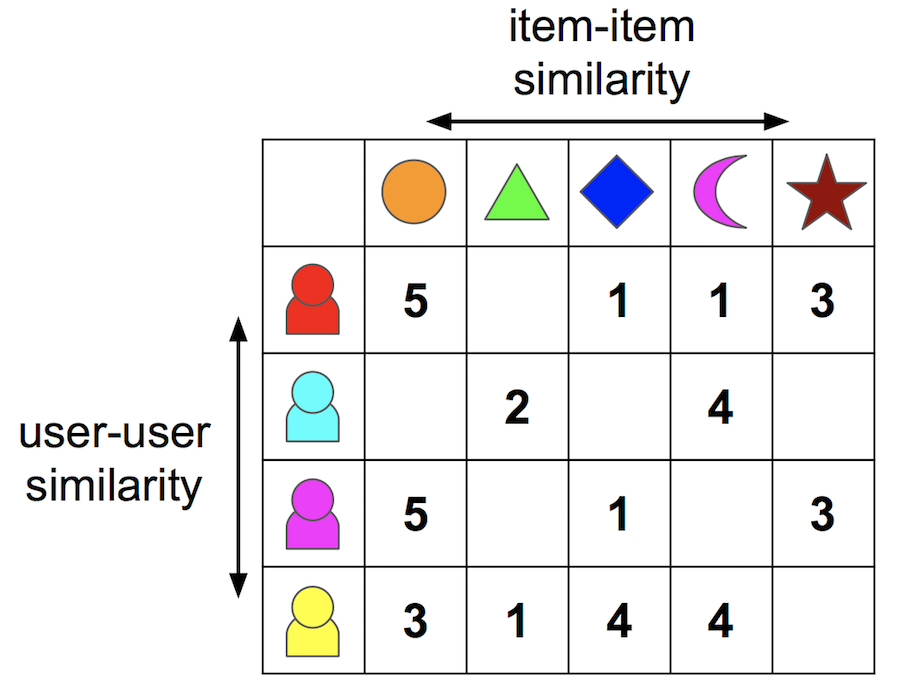

In [ ]:
illustration.collaborative

Collaborative filtering bertujuan untuk memprediksi nilai pada elemen-elemen yang belum terisi. Jika skor pada elemen yang diprediksi tinggi, maka produk tersebut akan direkomendasikan kepada pelanggan tersebut. Sebagai contoh, pengguna berwarna ungu dapat dilihat memiliki kesamaan dengan pengguna berwarna merah. Oleh karena itu, prediksi pengguna berwarna ungu untuk elemen bulan adalah 1. Namun, ini tidak ideal karena rentang nilai adalah 1 hingga 5. Akibatnya, item bulan tidak direkomendasikan untuk pengguna berwarna ungu. Prinsip ini berlaku juga sebaliknya.

Konsep Collaborative filtering adalah memanfaatkan kesamaan customer dan item-item (produk) yang pernah dibelinya.

In [ ]:
cbf.customer_id.nunique()

50705

Kita menggunakan data customer yang benar-benar sudah pernah melakukan transaksi sebelumnya. Jadi kita tahu historis data yang dibeli.

In [ ]:
data = Dataset.load_from_df(cbf[['customer_id', 'product_id', 'quantity']],
                            Reader())
trainset = data.build_full_trainset()

Karen tidak ada rating dalam dataset yang menunjukkan kepopuleran atau top produk di e-commerce ini. Maka kita menggunakan quantitiy, sebagai asumsi produk terbaik atau populer adalah produk yang quantitynya terbanyak (banyak terjual).

In [ ]:
model = SVD()
model.fit(trainset)

In [ ]:
model.predict(43202, 13059)

Prediction(uid=43202, iid=13059, r_ui=None, est=2.1388050937373646, details={'was_impossible': False})

est=12.241660523379395 yang menunjukkan prediksi user tersebut beli adalah dengan quantitiy mendekati itu.

Prediksi quantity produk yang belum dibeli

In [ ]:
customer_id = 43202

Misal kita mau ngecek produk yang belum pernah dibeli customer dengan id 43202

In [ ]:
all_product_id = cbf.product_id.unique()
all_product_id

<IntegerArray>
[54728, 16193, 53686, 20228, 55220, 59620, 53136, 14142, 12282, 53051,
 ...
 28909, 39001, 56009, 15020, 11917, 38577,  6965, 17659, 47151, 52323]
Length: 44446, dtype: Int64

Produk yang sudah dibeli customer tersebut.

In [ ]:
buyed = cbf[cbf.customer_id == 43202].product_id
buyed.head()

501     18001
5041    24598
7165    10826
7722     5215
8902    55380
Name: product_id, dtype: Int64

Produk yang belum dibeli customer tersebut

In [ ]:
not_buyed = [product_id for product_id in all_product_id if product_id not in buyed ]
not_buyed

[54728,
 16193,
 53686,
 20228,
 55220,
 59620,
 53136,
 14142,
 12282,
 53051,
 24081,
 9321,
 25734,
 35062,
 43820,
 19341,
 17601,
 43711,
 4063,
 46728,
 31302,
 11599,
 39204,
 6572,
 18001,
 10460,
 2334,
 18477,
 33212,
 21995,
 51055,
 18476,
 51799,
 37056,
 49520,
 6889,
 47283,
 39104,
 52906,
 22169,
 44664,
 47418,
 38806,
 22485,
 37966,
 57993,
 43835,
 3457,
 58640,
 51410,
 19769,
 44864,
 56919,
 21640,
 15700,
 10376,
 50629,
 22987,
 13903,
 27013,
 57914,
 45764,
 25678,
 55186,
 24394,
 12801,
 8083,
 55184,
 15530,
 37694,
 13971,
 6987,
 58181,
 54569,
 22325,
 5279,
 53132,
 38663,
 21905,
 34982,
 26997,
 49306,
 55830,
 2268,
 13416,
 25179,
 45779,
 23072,
 41476,
 18848,
 50313,
 37810,
 9354,
 13699,
 15683,
 47615,
 24395,
 58314,
 36087,
 34855,
 5358,
 26653,
 38477,
 40431,
 18270,
 6282,
 33692,
 45375,
 47188,
 44174,
 24467,
 25852,
 27034,
 20503,
 19054,
 37935,
 16744,
 18231,
 44497,
 33513,
 3267,
 17885,
 8304,
 36053,
 50210,
 24537,
 53744,

Maka dari product-product yang belum dibeli itu, kita prediksi quantity akan membelinya berapa. Kalau scorenya tinggi, maka kita rekoemndasikan.

In [ ]:
score = [model.predict(customer_id, product_id).est for product_id in not_buyed]
score

[1.8563333019292758,
 1.263808833672791,
 1.1952652177514755,
 1.4466550493046137,
 1.7255717885387134,
 1.2577469804942991,
 1.3906735978143718,
 1.3459582222030502,
 1.2269648378789073,
 1.6906377141852136,
 2.3828374486254775,
 2.2060720663134616,
 2.853215112446548,
 1.059631568730419,
 1,
 1.8002239042714698,
 2.566673496037364,
 1.476662175745183,
 2.143097379965009,
 1.0946731943034704,
 1,
 1.6918667265211145,
 1,
 1.3381631017637514,
 1.5395064119393167,
 1.7935570769109965,
 1.0153326424755877,
 1.7769805021014895,
 1.6235897615966386,
 1,
 1.2372049614892695,
 1.0288699798699477,
 2.1445508744922264,
 1.8217338013146445,
 1.150703498569814,
 1.3904349039534474,
 2.3840633378907654,
 3.52083660426167,
 1.333824297567068,
 1.88382416235982,
 1.0291678896391088,
 1.1432605104957752,
 1,
 2.776228503387874,
 1.4067417250866043,
 1,
 1.6471554191870963,
 1.770691355808726,
 1.5451941773271685,
 2.0544230362051206,
 1.7861987420804264,
 2.0206087748785864,
 1.0156137586129186,
 2.

Berikut daftar produk yang belum pernah dibeli user, dan diprediksi akan beli berapa produk tersebut. Produk yang memiliki skor tinggi kemungkinan besar adalah dari produk yang memiliki kesamaan dengan produk yang sudah dibeli, dan ada kesamaan pula dengan preferensi user.

In [ ]:
recommendations_df = pd.DataFrame({'product_id': not_buyed, 'score': score})

sorted_recommendations = recommendations_df.sort_values(by='score', ascending=False)

sorted_recommendations[['product_id', 'score']].head(100)

,product_id,score
18354,10294,5.000000
32415,3710,5.000000
28151,50527,5.000000
43144,51661,5.000000
9684,53053,5.000000
...,...,...
6503,9259,4.584122
9799,5759,4.569423
20701,17708,4.567290
32282,54605,4.544810


Ditampilakn 100 rekomendasi produk dengan score paling tinggi.

### **ML Engineering: Collaborative Filtering**

In [ ]:
# membuat model Collaborative Filtering
class RecommenderSystem3:
    def __init__(self, cbf):
        # Inisialisasi dengan dataset content-based filtering
        self.cbf = cbf
        self.all_product_id = self.cbf.product_id.unique()
        self.model = None

    def fit(self):
        # Fungsi untuk melatih model Collaborative Filtering
        data = Dataset.load_from_df(self.cbf[['customer_id', 'product_id',
                                              'quantity']], Reader())
        trainset = data.build_full_trainset()

        self.model = SVD()
        self.model.fit(trainset)

    def recommend(self, customer_id, topk=None):
        # Fungsi untuk memberikan rekomendasi berdasarkan Collaborative Filtering
        buyed = self.cbf[self.cbf.customer_id == customer_id].product_id
        not_buyed = [product_id for product_id in self.all_product_id if product_id not in buyed]
        score = [self.model.predict(customer_id, product_id).est for product_id in not_buyed]

        result = pd.DataFrame({'product_id': not_buyed, 'pred_score': score})
        result.sort_values('pred_score', ascending=False, inplace=True)
        return result

# melakukan fit kesamaan user
recsys3 = RecommenderSystem3(cbf)
recsys3.fit()

In [ ]:
# menampilkan hasil untuk kesamaan user
recsys3.recommend(customer_id=43202).head(20)

,product_id,pred_score
42277,32536,5.0
4215,29612,5.0
16964,46825,5.0
4861,29869,5.0
36769,56653,5.0
994,8320,5.0
30600,12876,5.0
35033,24574,5.0
43440,49831,5.0
26662,4205,5.0


### **Model Evaluation**

In [ ]:
# membuat model evaluasi untuk Collaborative Filtering
class RecommenderSystem:
    def __init__(self, cbf):
        self.cbf = cbf
        self.all_product_id = self.cbf.product_id.unique()
        self.model = None

    def fit(self):
        data = Dataset.load_from_df(self.cbf[['customer_id', 'product_id',
                                              'quantity']], Reader())
        trainset = data.build_full_trainset()

        self.model = SVD()
        self.model.fit(trainset)

    def recommend(self, customer_id, topk=50):
        buyed = self.cbf[self.cbf.customer_id == customer_id].product_id
        not_buyed = [product_id for product_id in self.all_product_id if product_id not in buyed]
        score = [self.model.predict(customer_id, product_id).est for product_id in not_buyed]

        result = pd.DataFrame({'product_id': not_buyed, 'pred_score': score})
        result.sort_values('pred_score', ascending=False, inplace=True)
        return result.head(topk)

    def evaluate(self):
        data = Dataset.load_from_df(self.cbf[['customer_id', 'product_id',
                                              'quantity']], Reader())
        cv_results = cross_validate(self.model, data, measures=['RMSE'], cv=5,
                                    verbose=True)
        return cv_results

# melakukan fit pada model evaluasi
recsys4 = RecommenderSystem(cbf)
recsys4.fit()

In [ ]:
# melakukan evaluasi pada model
evaluation_results = recsys4.evaluate()

print("-----")
print("Cross-validation Results:")
evaluation_results

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6369  1.6588  1.6380  1.6453  1.6617  1.6481  0.0104  
Fit time          13.14   13.32   13.35   13.28   13.32   13.28   0.07    
Test time         2.00    1.17    2.00    2.06    1.10    1.67    0.44    
-----
Cross-validation Results:


{'test_rmse': array([1.63689109, 1.65876202, 1.63795283, 1.64529865, 1.66174368]),
 'fit_time': (13.139634847640991,
  13.319498062133789,
  13.352190732955933,
  13.280037879943848,
  13.315444707870483),
 'test_time': (2.003255844116211,
  1.1669204235076904,
  2.0015487670898438,
  2.0616164207458496,
  1.0962624549865723)}

1.   RMSE mengukur seberapa jauh prediksi model dari nilai sebenarnya. Semakin rendah RMSE, semakin baik kinerja model. Dalam kasus ini, nilai RMSE pada kisaran 1.6480 dengan deviasi standar 0.0146 menunjukkan bahwa model memiliki kinerja yang cukup baik dalam memprediksi peringkat, tetapi kemungkinan masih ada ruang untuk peningkatan.
2.   Fit time mencerminkan waktu yang dibutuhkan untuk melatih model, sedangkan test time adalah waktu yang dibutuhkan untuk melakukan pengujian. Dalam evaluasi ini, rata-rata waktu pelatihan adalah sekitar 13.42 detik, dan rata-rata waktu pengujian adalah sekitar 1.66 detik.
Waktu pelatihan dan pengujian yang relatif cepat adalah keuntungan, terutama untuk skenario di mana responsivitas sistem rekomendasi penting.

## **Insight**

1.   Setiap industri dan perusahaan memiliki formula rekomendasi produknya masing-masing. Implementasi sistem rekomendasi ini dapat membantu meningkatkan penjualan, memperbaiki pengalaman berbelanja, dan menghemat biaya 5-10% untuk pemasaran yang bisa tidak dilakukan karena berhasil mempertahankan pelanggan lama. Serta fokus pada hubungan dengan pelanggan yang sudah ada juga dapat memberikan hasil positif secara ekonomis, mencegah penurunan penjualan setelah penurunan besar-besaran di tahun 2022.

2.   Dalam konteks rekomendasi, tidak ada jawaban yang benar atau salah; preferensi pengguna menjadi kunci. Model berusaha memudahkan pengguna dengan memberikan rekomendasi berdasarkan data historis, meningkatkan kenyamanan dalam pencarian produk. Implementasi ini membantu perusahaan meningkatkan penjualan dengan memberikan pengalaman berbelanja yang lebih efisien.




## **Recommendation**


1.   Untuk meningkatkan retensi pelanggan, dapat menggunakan model rekomendasi produk yang lebih update dari aktivitas user dengan data clickstream (yang berisi aktivitas user seperti add to chart, homepage, search keyword dan lainnya). Direkomendasikan pula untuk menambahkan fitur rating product (yang benar-benar menunjukkan kualitas produk dari penilaian customer). Jika hasil implementasi tidak sesuai target, metode lain seperti Deep Learning, Context-Aware Recommendation, Association Rule Mining, Factorization Machines, Word Embeddings, atau lainnya dapat diuji.

2.   Perlu dilakukan monitoring dan pembaruan secara berkala untuk menjaga dan meningkatkan retensi pelanggan, mengikuti perubahan perilaku pelanggan dan tren produk.



# **V. Data and Result Recap**

1.   Setiap industri dan perusahaan memiliki formula content-base yang berbeda-beda, sehingga kriteria penilaian mungkin dapat diubah dan disesuaikan.

2.   Dalam konteks rekomendasi, **tidak ada jawaban yang benar atau salah**, karena semuanya kembali kepada pengguna. Bahkan jika kami merekomendasikan sesuatu yang sepenuhnya sesuai dengan preferensi pengguna, ada kemungkinan bahwa pengguna akan melakukan scroll lagi dan mengklik opsi yang mungkin berada pada urutan yang berbeda. Model ini berusaha memberikan rekomendasi kepada pengguna berdasarkan preferensi yang diperoleh dari data historis. Hal ini dilakukan untuk membuat pengguna merasa nyaman atau senang menggunakan layanan e-commerce ini. Sebagai contoh, pengguna tidak perlu menghabiskan banyak waktu untuk mencari produk sesuai dengan kriterianya karena sudah ada rekomendasi berdasarkan preferensinya. Ini juga dapat membuat pengguna berpikir tidak hanya tentang 'saya akan membeli produk ini atau tidak', tetapi lebih kepada 'saya akan membeli produk ini dengan produk yang mana'. Dengan demikian, manfaat dari implementasi ini adalah membantu perusahaan meningkatkan penjualannya.

## **for Demographic Filtering**

Menampilkan rekomendasi untuk user yang baru bergabung dan belum memilki histori pembelanjaan barang, dan terbagi dalam dua model:

1. Model dengan produk terpopuler menurut quantity, untuk user baru
2. Model dengan menyesuaikan gender user, kategori produk, dan bulan tertentu

**1. Model dengan produk terpopuler menurut quantity, untuk user baru**

In [ ]:
# Menampilkan 20 produk teratas
top_products.head(20)

,product_id,Total Quantity Sold,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
0,39731,87,Apparel,Bottomwear,Skirts,Grey,Summer,Formal,Arrow Woman Grey Skirt
1,13992,86,Footwear,Shoes,Sports Shoes,Grey,Fall,Sports,Puma Women Body Train Grey Sports Shoes
2,10445,85,Apparel,Bottomwear,Jeans,Blue,Fall,Casual,Flying Machine Men Midrise Blue Jeans
3,42953,83,Accessories,Belts,Belts,Black,Summer,Casual,French Connection Men Black Leather Belt
4,2329,82,Apparel,Topwear,Tshirts,Grey,Fall,Casual,Reebok Men Force India Grey T-shirt
5,8828,80,Apparel,Topwear,Shirts,White,Fall,Casual,Spykar Men Ranger Yellow N Blue Stripes White ...
6,17369,79,Accessories,Accessories,Accessory Gift Set,Purple,Fall,Formal,Arrow Men Formal Purple Tie+Cufflink+Pocket sq...
7,58001,77,Apparel,Dress,Dresses,Black,Fall,Casual,Latin Quarters Women Black Printed Dress
8,25774,77,Apparel,Topwear,Suspenders,Beige,Summer,Formal,Lino Perros Men Beige Suspenders
9,8729,76,Apparel,Topwear,Shirts,Green,Fall,Casual,Indigo Nation Men Checks Blue Shirt


**2. Model dengan menyesuaikan gender user, kategori produk, dan bulan tertentu**

**Untuk Wanita**

Disini di tampilkan hasil untuk user wanita dengan filter yang sudah di tentukan

In [ ]:
# menampilkan hasil untuk gender wanita
recsys1.recommend(gender='Women', period=None, masterCategory=['Apparel'])

,product_id,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,total_sold
0,18261,Apparel,Topwear,Kurtas,Blue,Fall,Ethnic,Aneri Women Anshu Blue Kurta,42
1,40667,Apparel,Topwear,Tops,Red,Summer,Casual,Lee Women Red Top,26
2,51501,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Denizen Women Blue Jeans,22
3,40373,Apparel,Topwear,Tops,White,Summer,Casual,Tokyo Talkies Women White Top,20
6,6472,Apparel,Topwear,Tshirts,White,Summer,Casual,ADIDAS Wmen's Free Soul White T-shirt,20
4,34957,Apparel,Saree,Sarees,Beige,Summer,Ethnic,Fabindia Beige Jaipur Print Cotton Sari,19
12,24153,Apparel,Topwear,Kurtas,Black,Fall,Ethnic,Aurelia Women Black Printed Kurta,19
5,47066,Apparel,Bottomwear,Patiala,Teal,Fall,Ethnic,Shree Women Teal Printed Patiala,18
14,55786,Apparel,Loungewear and Nightwear,Nightdress,Black,Summer,Casual,SDL by Sweet Dreams Women Black Nightdress,17
7,11355,Apparel,Topwear,Tops,Black,Fall,Casual,United Colors Of Benetton Women Light Winter B...,17


**Untuk Pria**

In [ ]:
# menampilkan hasil untuk gender pria
recsys1.recommend(gender='Women', period=None, masterCategory=['Apparel'])

,product_id,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,total_sold
0,18261,Apparel,Topwear,Kurtas,Blue,Fall,Ethnic,Aneri Women Anshu Blue Kurta,42
1,40667,Apparel,Topwear,Tops,Red,Summer,Casual,Lee Women Red Top,26
2,51501,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Denizen Women Blue Jeans,22
3,40373,Apparel,Topwear,Tops,White,Summer,Casual,Tokyo Talkies Women White Top,20
6,6472,Apparel,Topwear,Tshirts,White,Summer,Casual,ADIDAS Wmen's Free Soul White T-shirt,20
4,34957,Apparel,Saree,Sarees,Beige,Summer,Ethnic,Fabindia Beige Jaipur Print Cotton Sari,19
12,24153,Apparel,Topwear,Kurtas,Black,Fall,Ethnic,Aurelia Women Black Printed Kurta,19
5,47066,Apparel,Bottomwear,Patiala,Teal,Fall,Ethnic,Shree Women Teal Printed Patiala,18
14,55786,Apparel,Loungewear and Nightwear,Nightdress,Black,Summer,Casual,SDL by Sweet Dreams Women Black Nightdress,17
7,11355,Apparel,Topwear,Tops,Black,Fall,Casual,United Colors Of Benetton Women Light Winter B...,17


## **for Content-Based Filtering**

Selanjutnya menampilkan produk rekomendasi berdasarkan kesamaan barangnya untuk 1000 line pertama.

In [ ]:
# menampilkan 1000 hasil rekomendasi berdasarkan kesamaan produk
recsys2.recommend(39731).head(20)  # masukan produk id yang diinginkan

,product_id,combined_features,quantity
1,53893,Accessories Bags Women Handbags Green Summer C...,48
3,53654,Accessories Bags Women Handbags Green Summer C...,45
4,28444,Accessories Bags Women Handbags Green Summer C...,42
2,53666,Accessories Bags Women Handbags Green Summer C...,28
6,53720,Accessories Bags Women Handbags Green Summer C...,25
0,53673,Accessories Bags Women Handbags Green Summer C...,21
5,54182,Accessories Bags Women Handbags Green Summer C...,18
12,29743,Accessories Bags Women Handbags Green Summer C...,37
8,29737,Accessories Bags Women Handbags Green Summer C...,36
7,29735,Accessories Bags Women Handbags Green Summer C...,35


## **for Collaborative Filtering**

Selanjutnya menampilkan produk rekomendasi berdasarkan kesamaan user untuk 20 user dengan jarak nilai yang paling mendekati.

In [ ]:
# menampilkan hasil untuk kesamaan user
recsys3.recommend(39731).head(20)  # masukan user id yang diinginkan

,product_id,pred_score
27914,25774,3.485649
36604,8237,3.249417
3411,42112,3.189899
24832,17369,3.164663
17546,36357,3.108438
8515,14411,3.063823
18312,56298,3.063416
22831,43927,3.051196
6696,9504,3.051102
9976,58144,3.037130


## **for All Model**

Setelah kita tahu output semua model yang ada, kita lanjut pada penggunaan secara langsung di e-commerce tersebut dengan melakukan kondisi-kondisi tertentu sebagai berikut

**1. Kondisi pertama**

* User belum login, dan
* User baru dengan history join tidak lebih dari 30-60 hari

Ketika kondisi pertama terjadi, maka Demographic Filtering menjadi model yang paling tepat untuk merekomendasikan item-item kepada user tersebut.






**Kondisi ketika user belum login**

In [ ]:
# Menampilkan 20 produk teratas
top_products.head(20)   # jumlah produk dapat menyesuaikan

,product_id,Total Quantity Sold,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
0,39731,87,Apparel,Bottomwear,Skirts,Grey,Summer,Formal,Arrow Woman Grey Skirt
1,13992,86,Footwear,Shoes,Sports Shoes,Grey,Fall,Sports,Puma Women Body Train Grey Sports Shoes
2,10445,85,Apparel,Bottomwear,Jeans,Blue,Fall,Casual,Flying Machine Men Midrise Blue Jeans
3,42953,83,Accessories,Belts,Belts,Black,Summer,Casual,French Connection Men Black Leather Belt
4,2329,82,Apparel,Topwear,Tshirts,Grey,Fall,Casual,Reebok Men Force India Grey T-shirt
5,8828,80,Apparel,Topwear,Shirts,White,Fall,Casual,Spykar Men Ranger Yellow N Blue Stripes White ...
6,17369,79,Accessories,Accessories,Accessory Gift Set,Purple,Fall,Formal,Arrow Men Formal Purple Tie+Cufflink+Pocket sq...
7,58001,77,Apparel,Dress,Dresses,Black,Fall,Casual,Latin Quarters Women Black Printed Dress
8,25774,77,Apparel,Topwear,Suspenders,Beige,Summer,Formal,Lino Perros Men Beige Suspenders
9,8729,76,Apparel,Topwear,Shirts,Green,Fall,Casual,Indigo Nation Men Checks Blue Shirt


**Ketika user baru mendaftar tidak lebih dari 30-60 hari dari setelah mendaftar**

Rekomendasi untuk user gender wanita

In [ ]:
# menampilkan hasil untuk gender wanita
recsys1.recommend(gender='Women', period=None, masterCategory=['Apparel'])

,product_id,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,total_sold
0,18261,Apparel,Topwear,Kurtas,Blue,Fall,Ethnic,Aneri Women Anshu Blue Kurta,42
1,40667,Apparel,Topwear,Tops,Red,Summer,Casual,Lee Women Red Top,26
2,51501,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Denizen Women Blue Jeans,22
3,40373,Apparel,Topwear,Tops,White,Summer,Casual,Tokyo Talkies Women White Top,20
6,6472,Apparel,Topwear,Tshirts,White,Summer,Casual,ADIDAS Wmen's Free Soul White T-shirt,20
4,34957,Apparel,Saree,Sarees,Beige,Summer,Ethnic,Fabindia Beige Jaipur Print Cotton Sari,19
12,24153,Apparel,Topwear,Kurtas,Black,Fall,Ethnic,Aurelia Women Black Printed Kurta,19
5,47066,Apparel,Bottomwear,Patiala,Teal,Fall,Ethnic,Shree Women Teal Printed Patiala,18
14,55786,Apparel,Loungewear and Nightwear,Nightdress,Black,Summer,Casual,SDL by Sweet Dreams Women Black Nightdress,17
7,11355,Apparel,Topwear,Tops,Black,Fall,Casual,United Colors Of Benetton Women Light Winter B...,17


Rekomendasi untuk user gender pria

In [ ]:
# menampilkan hasil untuk gender pria
recsys1.recommend(gender='Women', period=None, masterCategory=['Apparel'])

,product_id,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,total_sold
0,18261,Apparel,Topwear,Kurtas,Blue,Fall,Ethnic,Aneri Women Anshu Blue Kurta,42
1,40667,Apparel,Topwear,Tops,Red,Summer,Casual,Lee Women Red Top,26
2,51501,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Denizen Women Blue Jeans,22
3,40373,Apparel,Topwear,Tops,White,Summer,Casual,Tokyo Talkies Women White Top,20
6,6472,Apparel,Topwear,Tshirts,White,Summer,Casual,ADIDAS Wmen's Free Soul White T-shirt,20
4,34957,Apparel,Saree,Sarees,Beige,Summer,Ethnic,Fabindia Beige Jaipur Print Cotton Sari,19
12,24153,Apparel,Topwear,Kurtas,Black,Fall,Ethnic,Aurelia Women Black Printed Kurta,19
5,47066,Apparel,Bottomwear,Patiala,Teal,Fall,Ethnic,Shree Women Teal Printed Patiala,18
14,55786,Apparel,Loungewear and Nightwear,Nightdress,Black,Summer,Casual,SDL by Sweet Dreams Women Black Nightdress,17
7,11355,Apparel,Topwear,Tops,Black,Fall,Casual,United Colors Of Benetton Women Light Winter B...,17


Untuk user yang baru mendaftar, rekomendasi produk atau item yang di tampilkan berupa campuran anatara produk terpopuler dan produk yang di sesuaikan berdasarkan gender dan kategori tertentu.

**2. Kondisi kedua**

* User sudah mendaftar serta sudah 30-60 hari sejak user mendaftar
* Terdapat data history belanja pada user tersebut


In [ ]:
# Filter produk id yang baru di beli customer
df_id = df.copy()

# Menghapus data yang duplikat
df_unique = df_id.drop_duplicates(subset=['customer_id', 'product_id'])

# Menghapus nilai NaN (jika ada)
df_unique = df_unique.dropna()

# Menampilkan DataFrame hasil
df_unique[['customer_id', 'product_id']]

,customer_id,product_id
0,5868,54728
1,82831,54728
2,47013,54728
3,17135,54728
4,70185,54728
...,...,...
852579,49681,52323
852580,53758,52323
852581,16993,52323
852582,85064,52323


In [ ]:
# Menginisiasi pemodelan untuk seluruh data yang ada

# Mengambil nilai produk_id yang telah disesuaikan
# p_id dapat digunakan untuk model Content-Based Filtering
p_id = df_unique[['product_id']]

# Mengambil nilai customer_id yang telah di sesuaikan
# c_id dapat digunakan untuk model Collaborative Filtering
c_id = df_unique[['customer_id']]

Jika pengguna telah memiliki riwayat pembelian, sistem akan merekomendasikan produk berdasarkan pembelian terakhir pengguna tersebut menggunakan metode Content-Based Filtering. Hal ini dilakukan dengan membandingkan produk yang mirip dengan produk yang telah dibeli oleh pelanggan sebelumnya.

In [ ]:
# menampilkan 1000 hasil rekomendasi berdasarkan kesamaan produk
recsys2.recommend(39731).head(20)  # masukan produk id yang diinginkan

,product_id,combined_features,quantity
1,53893,Accessories Bags Women Handbags Green Summer C...,48
3,53654,Accessories Bags Women Handbags Green Summer C...,45
4,28444,Accessories Bags Women Handbags Green Summer C...,42
2,53666,Accessories Bags Women Handbags Green Summer C...,28
6,53720,Accessories Bags Women Handbags Green Summer C...,25
0,53673,Accessories Bags Women Handbags Green Summer C...,21
5,54182,Accessories Bags Women Handbags Green Summer C...,18
12,29743,Accessories Bags Women Handbags Green Summer C...,37
8,29737,Accessories Bags Women Handbags Green Summer C...,36
7,29735,Accessories Bags Women Handbags Green Summer C...,35


In [ ]:
# menampilkan 1000 hasil rekomendasi berdasarkan kesamaan produk
recsys2.recommend(product_id)  # masukan produk id yang diinginkan

,product_id,combined_features,quantity
1,53893,Accessories Bags Women Handbags Green Summer C...,48
3,53654,Accessories Bags Women Handbags Green Summer C...,45
4,28444,Accessories Bags Women Handbags Green Summer C...,42
2,53666,Accessories Bags Women Handbags Green Summer C...,28
6,53720,Accessories Bags Women Handbags Green Summer C...,25
...,...,...,...
816,19606,Apparel Topwear Women Tops Green Summer Casual...,26
541,10322,Accessories Bags Women Handbags Black Winter C...,48
954,3973,Apparel Topwear Women Tops Green Summer Casual...,30
542,10323,Accessories Bags Women Handbags Black Winter C...,22


Selain itu, kita juga menggunakan Collaborative Filtering untuk melakukan pencocokan. Dalam model ini, terjadi pencocokan antar pengguna dengan membandingkan data dari setiap pembelian pelanggan.

In [ ]:
# menampilkan hasil untuk kesamaan user
recsys3.recommend(43202).head(20) # masukan customer_id yang di inginkan

,product_id,pred_score
42277,32536,5.0
4215,29612,5.0
16964,46825,5.0
4861,29869,5.0
36769,56653,5.0
994,8320,5.0
30600,12876,5.0
35033,24574,5.0
43440,49831,5.0
26662,4205,5.0


In [ ]:
# menampilkan hasil untuk kesamaan user
recsys3.recommend(customer_id) # masukan customer_id yang di inginkan

,product_id,pred_score
42277,32536,5.0
4215,29612,5.0
16964,46825,5.0
4861,29869,5.0
36769,56653,5.0
...,...,...
4274,43322,1.0
4273,5730,1.0
28417,25299,1.0
28416,58445,1.0
